# Symulacje Komputerowe - Raport
Konstanty Andrzejczak, Tomasz Srebrniak, Aleksandra Zachajska

## Cel:
W prezentowanej pracy celem jest rozwiƒÖzanie sze≈õciu zadanych zagadnie≈Ñ za pomocƒÖ metod poznanych na przedmiocie "Symulacje komputerowe". 

Na poczƒÖtku zadeklarujemy wszystkie biblioteki z jakich bƒôdziemy korzystaƒá w poni≈ºszym raporcie.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.integrate as integrate
import typing
import time
from scipy.special import lambertw

## 1: Generator ACORN (Additive Congruential Random Number)

### Cel
W pierwszym prezentowanym problemie mamy za zadanie zaimplementowanie generatora jako funkcjƒô $ACORN(N, k, M, Lag)$ zwracajƒÖcƒÖ N liczb pseudolosowych $Y_{n}^k$, dla n = 1,$\ldots, N$, korzystajƒÖc z algorytmu k-tego rzƒôdu, przy ominiƒôciu pierwszych $Lag$ wyraz√≥w. Przyk≈Çadowymi parametrami z jakich mamy skorzystaƒá mogƒÖ byƒá $M=2^{89}‚àí1$ (liczba pierwsza Mersenne‚Äôa), k = 9, $X_{0}^m = 0$ dla $m=0$ (mogƒÖ byƒá dowolne), $Lag = 10^3$. Nastƒôpnie mamy sprawdziƒá poprawno≈õƒá wyniku robiƒÖc wykresy ciƒÖgu $Y_n^k$, funkcji $Y_{n-1}^k -> Y_n^k$ oraz histogramy. Na sam koniec postaramy siƒô por√≥wnaƒá wydajno≈õƒá z wbudowanym generatorem numpy. 

### RozwiƒÖzanie
Zaczniemy rozwiƒÖzanie tego zagdanienia od g≈Ç√≥wnego celu zadania mianowicie od zaimplementowania funkcji generujƒÖcej ciƒÖg liczb pseudolosowych $ACORN$.

In [108]:
def ACORN(N: int, k: int = 9, M: int = 2**89-1, Lag: int = 10000) -> np.ndarray:
    """
    Funkcja ACORN generuje ciƒÖg liczb pseudolosowych przy u≈ºyciu algorytmu ACORN (Additive Congruential Random Number).

    INPUT:
        N (int): Liczba liczb pseudolosowych do wygenerowania.
        k (int): Liczba warstw w algorytmie ACORN. Domy≈õlna warto≈õƒá to 9.
        M (int): Modu≈Ç do oblicze≈Ñ. Domy≈õlna warto≈õƒá to 2**89 - 1.
        Lag (int): Op√≥≈∫nienie, czyli liczba poczƒÖtkowych warto≈õci do pominiƒôcia. Domy≈õlna warto≈õƒá to 10000.

    OUTPUT:
        np.ndarray: Tablica liczb pseudolosowych o d≈Çugo≈õci N.
    """
    seed = np.random.randint(1, 2**30)
    Xs = np.zeros((k+1, N+Lag))
    Xs[0, :] = seed
    for m in range(1, k+1):
        for n in range(1, N+Lag):
            Xs[m, n] = (Xs[m-1, n] + Xs[m, n-1]) % M
    return Xs[k, Lag:] / M

#### Wizualizacja liczb pseudolosowych

Wywo≈Çajmy funkcjƒô dla przykladowych parametr√≥w.

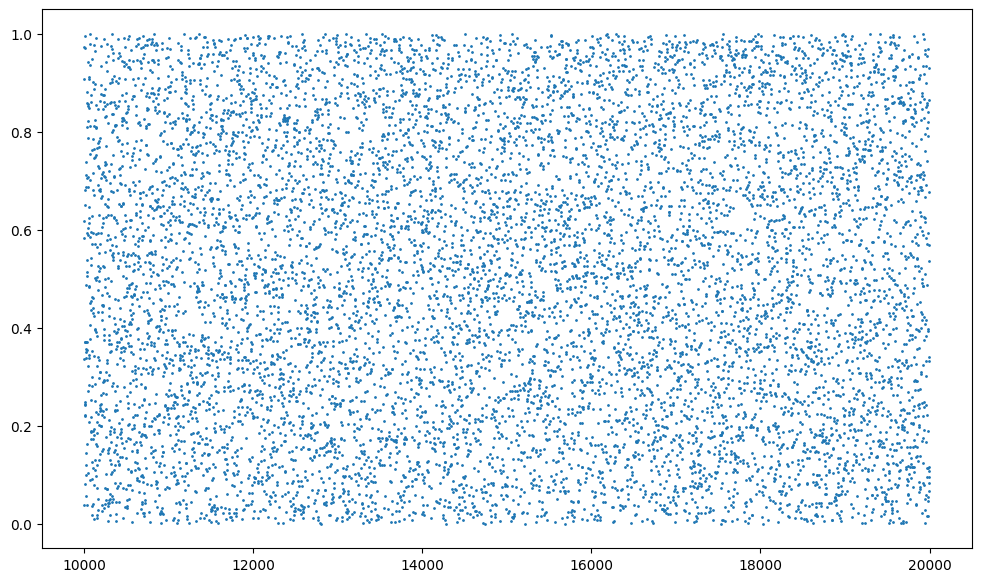

In [109]:
N = 10000
Xs = ACORN(N)
fig, ax = plt.subplots()
ax.scatter(np.arange(10000, N+10000, 1), Xs, s=1)
plt.show()

#### Wizualizacja zale≈ºno≈õci miƒôdzy kolejnymi wygenerowanymi liczbami

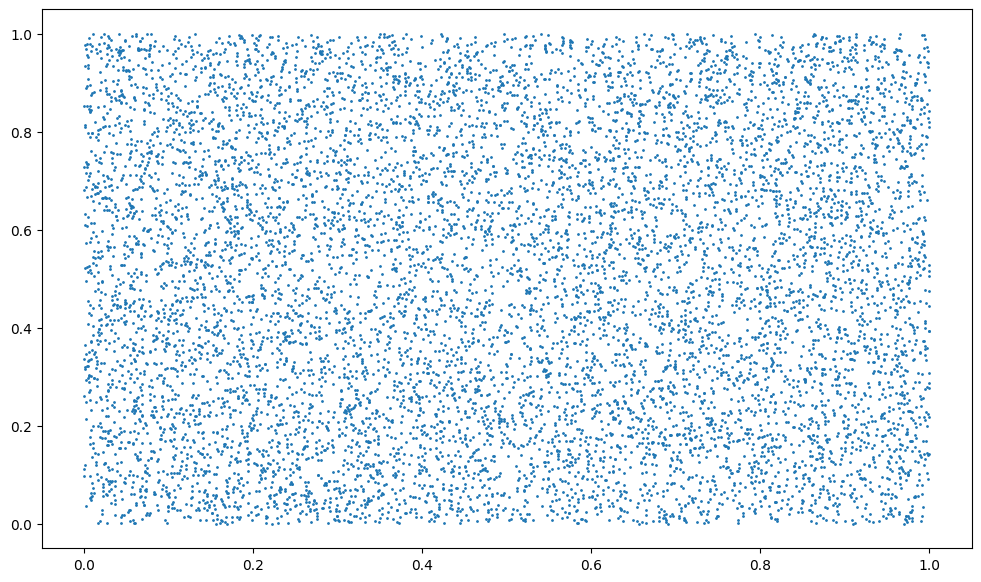

In [110]:
N = 10000
Xs = ACORN(N)
fig, ax = plt.subplots()
ax.scatter(Xs[:-1], Xs[1:], s=1)
plt.show()

#### Histogram rozk≈Çadu czƒôsto≈õci wystƒôpowania liczb pseudolosowych

<Axes: ylabel='Density'>

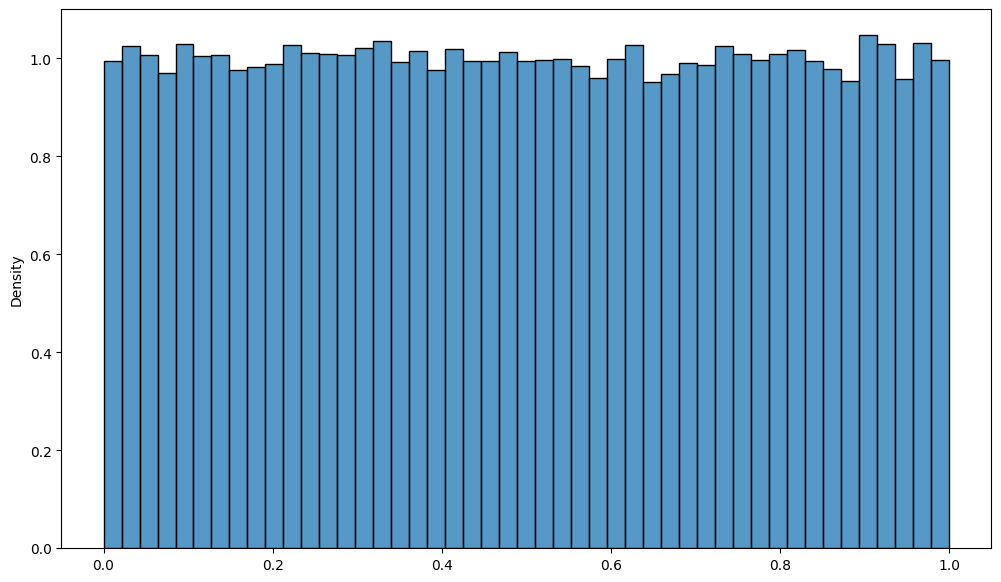

In [111]:
N = 100000
Xs = ACORN(N)
fig, ax = plt.subplots()
sns.histplot(Xs, stat='density', ax=ax)

Z powy≈ºszych wykres√≥w mo≈ºna wywnioskowaƒá, ≈ºe rozk≈Çad wygenerowanych zmiennych losowych jest r√≥wnomierny. Nie widaƒá znacznych r√≥≈ºnic w wysoko≈õciach s≈Çupk√≥w prezentowanych na histogramie. Jest to pozytywny wniosek i oczekiwana obserwacja. Teraz postaramy siƒô por√≥wnaƒá wydajno≈õƒá z wbudowanym generatorem numpy. W tym celu skorzystamy z funkcji time z biblioteki time.

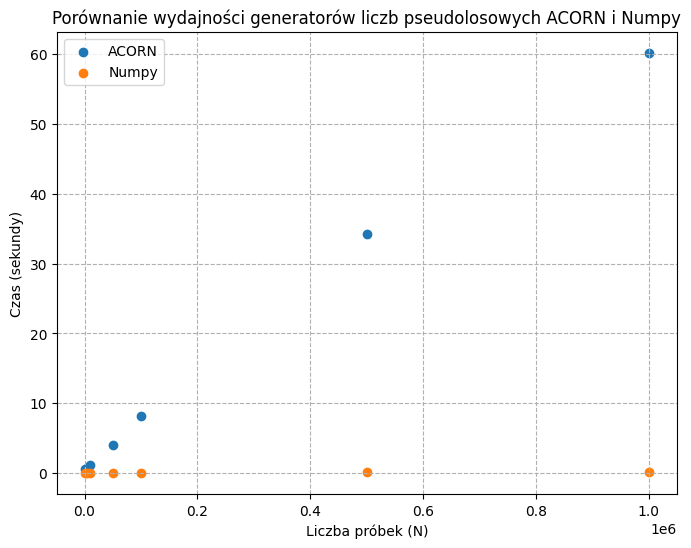

In [112]:
def measure_performance() -> typing.Tuple[typing.List[int], typing.List[float], typing.List[float]]:
    """
    Mierzy wydajno≈õƒá generowania losowych liczb przez ACORN i Numpy dla r√≥≈ºnych warto≈õci N.

    OUTPUTS:
        N_values: Lista warto≈õci N, dla kt√≥rych sƒÖ mierzone czasy wykonania.
        acorn_times: Lista czas√≥w wykonania dla ACORN (w sekundach).
        numpy_times: Lista czas√≥w wykonania dla Numpy (w sekundach).
    """
    N_values = [1000, 5000, 10000, 50000, 100000, 500000]
    acorn_times = []
    numpy_times = []

    for N in N_values:
        start_time = time.time()
        _ = ACORN(N)
        acorn_time = time.time() - start_time
        acorn_times.append(acorn_time)

        start_time = time.time()
        _ = np.random.rand(N) * (2**89 - 1)
        numpy_time = time.time() - start_time
        numpy_times.append(numpy_time)
        
    return N_values, acorn_times, numpy_times

N_values, acorn_times, numpy_times = measure_performance()

plt.figure(figsize=(8, 6))
plt.scatter(N_values, acorn_times, label='ACORN', marker='o')
plt.scatter(N_values, numpy_times, label='Numpy', marker='o')
plt.xlabel('Liczba pr√≥bek (N)')
plt.ylabel('Czas (sekundy)')
plt.title('Por√≥wnanie wydajno≈õci generator√≥w liczb pseudolosowych ACORN i Numpy')
plt.legend()
plt.grid(linestyle="--")
plt.show()

Por√≥wnanie czas√≥w prowadzi do konkluzji, ≈ºe czas realizacji generowania liczb pseudolosowych za pomocƒÖ biblioteki numpy jest zawsze bliski zera, nawet przy wysokich warto≈õciach ilo≈õci pr√≥bek. Natomiast czas realizacji generowania za pomocƒÖ metody ACORN ro≈õnie liniowo wraz ze wzrostem liczby pr√≥bek. 

## 2: Generowanie rozk≈Çadu normalnego

### Cel
W drugim zadaniu sprawdzimy dotychczas zaimplementowane algorytmy przedstawiajƒÖce kilka metod generowania rozk≈Çadu normalnego. Nastƒôpnie postaramy siƒô stworzyƒá dwie dodatkowe metody, mianowicie 
- metodƒô "tuzina",
- metodƒô zigguratu.
 
Finalnie por√≥wnamy efektywno≈õƒá generowania za pomocƒÖ kolejnych metod. 

### RozwiƒÖzanie
ZaczynajƒÖc rozwiƒÖzanie problemu rozpoczniemy od weryfikacji poprawno≈õci dzia≈Çania dotychczas zaimplementowanych metod. Jednak zanim, skonfigurujemy niekt√≥re z ustawie≈Ñ dla biblioteki Matplotlib. W poni≈ºszej kom√≥rce zadeklarowane zosta≈Çy polecenia majƒÖce na celu u≈Çatwienie p√≥≈∫niejszych manipulacji w obrƒôbie wykres√≥w w zwiƒÖzku z korzystaniem formatowania wyra≈ºe≈Ñ za pomocƒÖ LaTeX.

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.figsize'] = [12, 8]

PrzechodzƒÖc do w≈Ça≈õciwego kodu. Jako pierwsza zosta≈Ça zadeklarowana funkcja norm_inv_cdf kt√≥ra generuje liczby z rozk≈Çadu normalnego za pomocƒÖ metody odwrotnej dystrybuanty. Tutaj pos≈Çu≈ºyli≈õmy siƒô bibliotekƒÖ scipy. 

In [3]:
def norm_inv_cdf(size, mu=0, sigma=1):
    """
    Generuje n liczb z rozk≈Çadu normalnego o parametrach mu i sigma przy pomocy metody odwrotnej dystrybuanty.

    :param n: (int) liczba liczb do wygenerowania
    :param mu: (float) warto≈õƒá oczekiwana
    :param sigma: (float) odchylenie standardowe
    :return: (np.ndarray) n liczb z rozk≈Çadu normalnego
    """
    
    us = stats.uniform.rvs(size=size)
    return stats.norm.ppf(us, loc=mu, scale=sigma)

DrugƒÖ metodƒÖ poznanƒÖ na zajƒôciach jest metoda Boxa-Mullera prezentowana poni≈ºej. 

In [4]:
def box_muller(size=1, mu=0, sigma=1):
    """
    Generuje n liczb z rozk≈Çadu normalnego o parametrach mu i sigma za pomocƒÖ metody Boxa-Muellera

    :param n: (int) liczba liczb do wygenerowania
    :param mu: (float) warto≈õƒá oczekiwana
    :param sigma: (float) odchylenie standardowe
    :return: (np.ndarray) n liczb z rozk≈Çadu normalnego
    """
    
    u1, u2 = np.random.uniform(size=int(np.ceil(size / 2))), np.random.uniform(
        size=int(np.ceil(size / 2))
    )
    Xs = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2) * sigma + mu
    Ys = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2) * sigma + mu
    return np.hstack((Xs, Ys))[:size]

OstatniƒÖ metodƒÖ kt√≥rƒÖ por√≥wnamy w pierwszej czƒô≈õci bƒôdzie metoda biegunowa. 

In [5]:
def polar_method(size=1, mu=0, sigma=1):
    """
    Generuje n liczb z rozk≈Çadu normalnego o parametrach mu i sigma za pomocƒÖ metody biegunowej
    
    :param n: (int) liczba liczb do wygenerowania
    :param mu: (float) warto≈õƒá oczekiwana
    :param sigma: (float) odchylenie standardowe
    :return: (np.ndarray) n liczb z rozk≈Çadu normalnego
    """
    
    p = np.pi/4
    aux = p*(1-p)
    x = (3*np.sqrt(aux) + np.sqrt(9*aux + p*size))/p
    N = np.ceil(x*x)

    V1 = np.random.uniform(-1,1,size)
    V2 = np.random.uniform(-1,1,size)
    R2 = V1*V1 + V2*V2

    index = R2<1

    V1 = V1[index][:size]
    V2 = V2[index][:size]
    R2 = R2[index][:size]
    X = V1 * np.sqrt(-2*np.divide(np.log(R2), R2))
    Y = V2 * np.sqrt(-2*np.divide(np.log(R2), R2))
    return np.concatenate((X, Y))[:size] * sigma + mu

Aby sprawdziƒá poprawno≈õƒá powy≈ºszych metod, dla ka≈ºdej z nich wykonamy wykresy por√≥wnujƒÖce unormowany histogram z teoretycznƒÖ gƒôsto≈õciƒÖ, empirycznƒÖ dystrybuantƒô z teoretycznƒÖ dystrybuantƒÖ oraz wykresy kwantylowe. Por√≥wnamy r√≥wnie≈º pr√≥bkowe esytmatory warto≈õci oczekiwanej oraz wariancji z warto≈õciami teoretycznymi. Dla ka≈ºdego generatora przyjmujemy warto≈õƒá oczekiwanƒÖ $\mu=1$, odchylenie standardowe $\sigma=2$ oraz ilo≈õƒá pr√≥bek $n=10000$.

----------------------------------- NORMAL INV CDF -----------------------------------
Expected value empirical: 1.0047860179296078 Expected value Theoretical: 1
Variance empirical: 4.019402810376604 Variance Theoretical: 4
----------------------------------- BOX MULLER -----------------------------------
Expected value empirical: 0.9690104721241136 Expected value Theoretical: 1
Variance empirical: 4.055140983394129 Variance Theoretical: 4
----------------------------------- POLAR METHOD -----------------------------------
Expected value empirical: 0.9885657597284988 Expected value Theoretical: 1
Variance empirical: 4.09321373851156 Variance Theoretical: 4


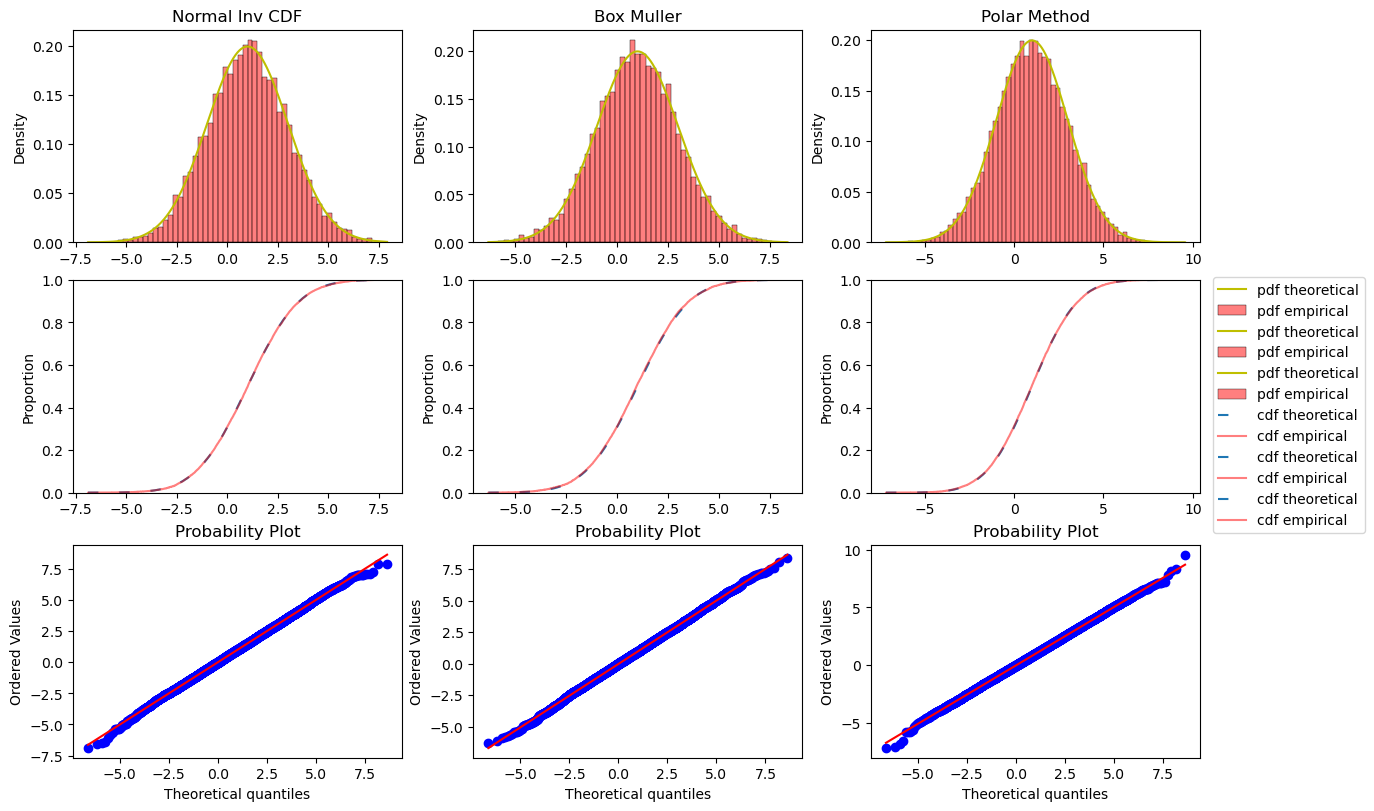

In [6]:
mu, sigma, n = 1, 2, 10000
X = np.zeros(shape=(3, n))
X[0, :] = norm_inv_cdf(n, mu, sigma)
X[1, :] = box_muller(n, mu, sigma)
X[2, :] = polar_method(n, mu, sigma)
print('----------------------------------- NORMAL INV CDF -----------------------------------')
print('Expected value empirical:', np.average(X[0]), 'Expected value Theoretical:', mu)
print('Variance empirical:', np.var(X[0]), 'Variance Theoretical:', sigma**2)
print('----------------------------------- BOX MULLER -----------------------------------')
print('Expected value empirical:', np.average(X[1]), 'Expected value Theoretical:', mu)
print('Variance empirical:', np.var(X[1]), 'Variance Theoretical:', sigma**2)
print('----------------------------------- POLAR METHOD -----------------------------------')
print('Expected value empirical:', np.average(X[2]), 'Expected value Theoretical:', mu)
print('Variance empirical:', np.var(X[2]), 'Variance Theoretical:', sigma**2)
fig, axes = plt.subplots(3, 3, layout="constrained")
val1 = np.unique(X[0, :])
val2 = np.unique(X[1, :])
val3 = np.unique(X[2, :])
axes[0, 0].plot(
    val1,
    stats.norm.pdf(val1, loc=1, scale=2),
    c="y",
    label="pdf theoretical",
)
sns.histplot(
    X[0, :], stat="density", ax=axes[0, 0], color="red", alpha=0.5, label="pdf empirical"
)
axes[1, 0].plot(
    val1,
    stats.norm.cdf(val1, loc=1, scale=2),
    label="cdf theoretical",
    linestyle=(0, (5, 10)),
)
sns.ecdfplot(X[0, :], label="cdf empirical", color="red", alpha=0.5, ax=axes[1, 0])
stats.probplot(X[0, :], dist="norm", sparams=(1, 2), plot=axes[2, 0])
axes[0, 0].set_title("Normal Inv CDF")
axes[0, 1].plot(
    val2,
    stats.norm.pdf(val2, loc=1, scale=2),
    c="y",
    label="pdf theoretical",
)
sns.histplot(
    X[1, :], stat="density", ax=axes[0, 1], color="red", alpha=0.5, label="pdf empirical"
)
axes[1, 1].plot(
    val2,
    stats.norm.cdf(val2, loc=1, scale=2),
    label="cdf theoretical",
    linestyle=(0, (5, 10)),
)
sns.ecdfplot(X[1, :], label="cdf empirical", color="red", alpha=0.5, ax=axes[1, 1])
stats.probplot(X[1, :], dist="norm", sparams=(1, 2), plot=axes[2, 1])
axes[0, 1].set_title("Box Muller")
axes[0, 2].plot(
    val3,
    stats.norm.pdf(val3, loc=1, scale=2),
    c="y",
    label="pdf theoretical",
)
sns.histplot(
    X[2, :], stat="density", ax=axes[0, 2], color="red", alpha=0.5, label="pdf empirical"
)
axes[1, 2].plot(
    val3,
    stats.norm.cdf(val3, loc=1, scale=2),
    label="cdf theoretical",
    linestyle=(0, (5, 10)),
)
sns.ecdfplot(X[2, :], label="cdf empirical", color="red", alpha=0.5, ax=axes[1, 2])
stats.probplot(X[2, :], dist="norm", sparams=(1, 2), plot=axes[2, 2])
axes[0, 2].set_title("Polar Method")
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Tak wykonane wykresy widoczne powy≈ºej potwierdzajƒÖ poprawno≈õƒá dzia≈Çania metod. Wynika to z na≈Ço≈ºenia siƒô warto≈õci oczewkiwanych z tymi generowanymi. Oczywi≈õcie widoczne sƒÖ delikatne odchylenia jednak sƒÖ one nieznaczne. 

## Dodatkowe metody generacji
W celu wykonania drugiej czƒô≈õci polecenia ziamplementowane zostanƒÖ dwie dodatkowe metody generowania rozk≈Çadu normalnego. Jako pierwsza zostanie rozpatrzona metoda tuzina.

### Metoda tuzina
ChcƒÖc przybli≈ºyƒá dzia≈Çanie omawianej metody warto powiedzieƒá, ≈ºe polega ona na generowaniu 12 realizacji zmiennych losowych z rozk≈Çadu $U(0,1)$, dodaniu ich do siebie i na ko≈Ñcu odjƒôciu liczby 6. Uzyskana w ten spos√≥b liczba jest w przybli≈ºeniu realizacjƒÖ zmiennej losowej z rozk≈Çadu $N(0,1)$. Dzia≈ÇajƒÖc wed≈Çug wymienionych krok√≥w zosta≈Ç zaimplemntowany poni≈ºej przedstawiony kod.  

In [7]:
def tuzin(size, mu=0, sigma=1):
    """
    Generuje n liczb z rozk≈Çadu normalnego o parametrach mu i sigma za pomocƒÖ metody tuzina

    :param size: (int) liczba liczb do wygenerowania
    :param mu: (float) warto≈õƒá oczekiwana
    :param sigma: (float) odchylenie standardowe
    :return: (np.ndarray) n liczb z rozk≈Çadu normalnego
    """
    
    Us = np.random.uniform(size=(size, 12))
    return sigma * (np.sum(Us, axis=1) - 6) + mu

Aby zweryfikowaƒá dzia≈Çanie tej metody wykonamy teraz taki sam test jak w pierwszej czƒô≈õci omawianego zadania.

----------------------------------- METODA TUZINA -----------------------------------
Expected value empirical: 0.9740329686450032 Expected value Theoretical: 1
Variance empirical: 3.962084379536911 Variance Theoretical: 4


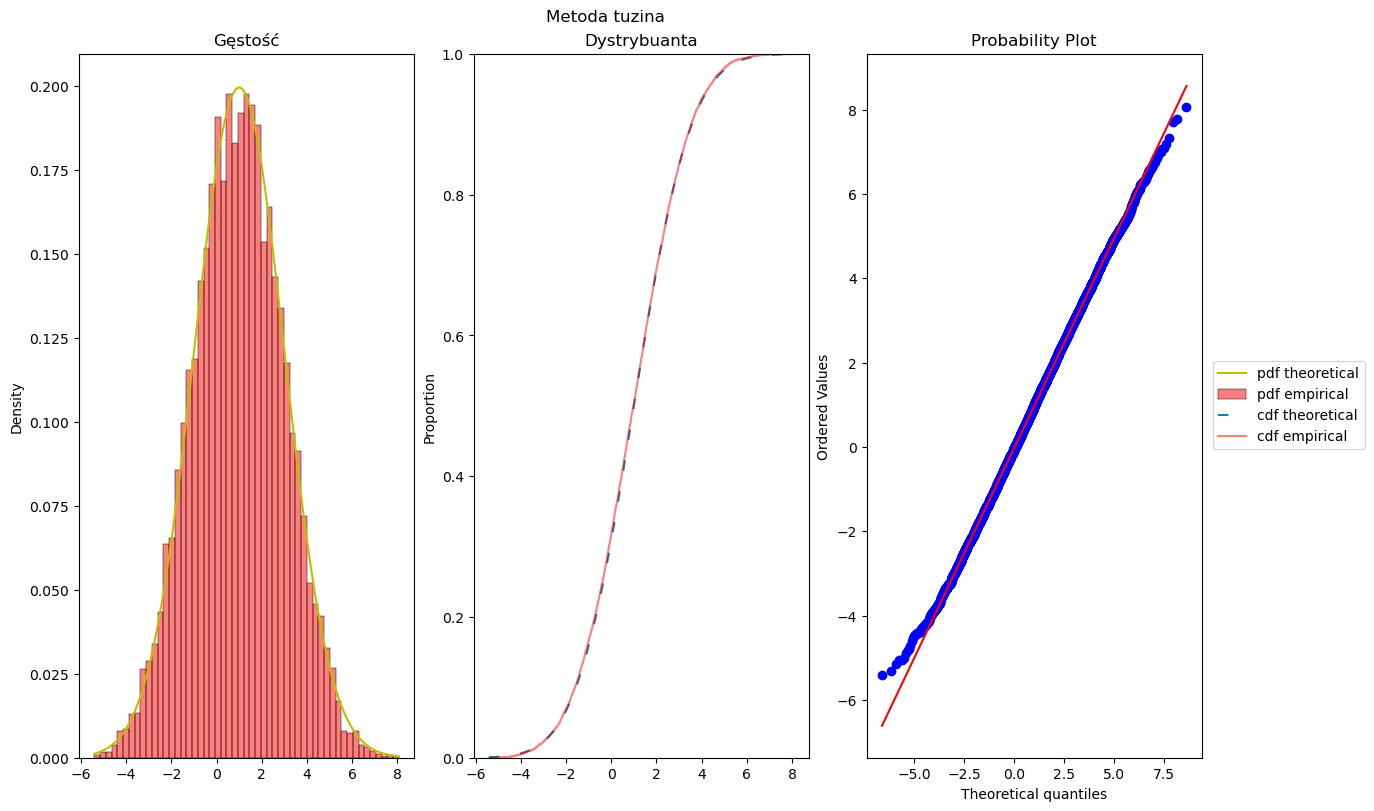

In [8]:
mu, sigma, n = 1, 2, 10000
X = tuzin(n, mu, sigma)
print('----------------------------------- METODA TUZINA -----------------------------------')
print('Expected value empirical:', np.average(X), 'Expected value Theoretical:', mu)
print('Variance empirical:', np.var(X), 'Variance Theoretical:', sigma**2)
fig, axes = plt.subplots(1, 3, layout="constrained")
val = np.unique(X)
axes[0].plot(
    val,
    stats.norm.pdf(val, loc=1, scale=2),
    c="y",
    label="pdf theoretical",
)
sns.histplot(
    X, stat="density", ax=axes[0], color="red", alpha=0.5, label="pdf empirical"
)
axes[1].plot(
    val,
    stats.norm.cdf(val, loc=1, scale=2),
    label="cdf theoretical",
    linestyle=(0, (5, 10)),
)
sns.ecdfplot(X, label="cdf empirical", color="red", alpha=0.5, ax=axes[1])
stats.probplot(X, dist="norm", sparams=(1, 2), plot=axes[2])
fig.suptitle("Metoda tuzina")
axes[0].set_title('Gƒôsto≈õƒá')
axes[1].set_title('Dystrybuanta')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Wyniki i w tym wypadku pokrywajƒÖ siƒô z wartosciami teoretycznymi. ≈öwiadczy to o poprawno≈õci modelu. 

### Metoda zigguratu
DrugƒÖ metodƒÖ jest metoda zigguratu. Przed implementacjƒÖ docelowego algorytmu we≈∫my funkcjƒô $f(x) = \exp(-x^2/2)$, kt√≥ra jest przeskalowanƒÖ¬†funkcjƒÖ¬†gƒôsto≈õci rozk≈Çadu $N(0,1)$. W dalszych dzia≈Çaniach bƒôdziemy skupiaƒá siƒô tylko na dziedzinie liczb rzeczywistych dodatnich. Nastƒôpnie zostanƒÖ zrealizowane kolejne kroki:
1. Obszar pod wykresem funkcji dzielimy na $n$ prostokƒÖt√≥w o r√≥wnych polach, ustawione jeden nad drugim. 
2. Zape≈Çniamy tablicƒô $n$ warto≈õciami $x$ i odpowiadajƒÖcymi ich warto≈õciami $f(x)$ zaczynajƒÖc od ustalonego $x_1$. 
3. WygenerowanƒÖ¬†tablicƒô bƒôdziemy wykorzystywaƒá ka≈ºdorazowo przy generacji zmiennych losowych.

In [9]:
f = lambda x: np.exp(-x**2 / 2)
f_inv = lambda y: np.sqrt(-2 * np.log(y))
n = 256
x1 = 3.6541528853610088
y1 = f(x1)
Table = np.zeros(shape=(n, 2))
Table[0, 0] = x1
Table[0, 1] = y1
tail_area = integrate.quad(f, x1, np.inf)[0]
A = x1 * y1 + tail_area
for i in range(1, n-1):
    Table[i, 1] = Table[i-1, 1] + A / Table[i-1, 0]
    Table[i, 0] = f_inv(Table[i, 1])
Table[n-1, 0] = 0
Table[n-1, 1] = 1

Po tak poczynionych krokach wstƒôpnych w docelowym algorytmie wygenerujemy kandydat√≥w na $x$ z r√≥≈ºnych warstw prosotkƒÖt√≥w. Je≈õli $x$ jest wiƒôkszy od $x_1$ stosujemy alternatywny algorytm. Je≈õli jest wiƒôkszy, przy u≈ºyciu wygenerowanej tablicy sprawdzamy czy znajduje siƒô¬†on poni≈ºej krzywej. ≈ªeby nie generowaƒá tylko zmiennych losowych dodatnich, 50% z nich bƒôdzie ujemna, dziƒôki wybraniu $U_0$ z rozk≈Çadu $U(-1,1)$. 

In [10]:
def ziggurat(size=1, mu=0, sigma=1, counter=False):
    """
    Generuje n liczb z rozk≈Çadu normalnego o parametrach mu i sigma za pomocƒÖ metody zigguratu

    :param size: (int) liczba liczb do wygenerowania
    :param mu: (float) warto≈õƒá oczekiwana
    :param sigma: (float) odchylenie standardowe
    :param counter: (bool) czy zwracaƒá¬†liczbƒô razy kiedy trzeba obliczyƒá eksponentƒô
    :return: (np.ndarray) n liczb z rozk≈Çadu normalnego
    """
    
    c = 0
    Xs = np.zeros(size)
    for i in range(size):
        while True:
            indx = int(np.floor(256 * np.random.uniform() - 1))
            U0 = 2 * np.random.uniform() - 1
            if i == -1:
                x = U0 * A / Table[0, 1]
            else:
                x = U0 * Table[indx, 0]
            if np.abs(x) < Table[indx+1, 0]:
                Xs[i] = x
                break
            if indx == -1:  # fallback
                while True:
                    x = -np.log(np.random.uniform()) / Table[0, 0]
                    y = -np.log(np.random.uniform())
                    if 2 * y > x**2:
                        Xs[i] = x + Table[0, 0]
                        break
                break
            else:
                c += 1
                y = Table[indx, 1] + np.random.uniform() * (Table[indx+1, 1] - Table[indx, 1])
                if y < f(x):
                    Xs[i] = x
                    break
    if counter:
        return c
    return Xs * sigma + mu

----------------------------------- METODA ZIGGURATU -----------------------------------
Expected value empirical: 0.9980734696457785 Expected value Theoretical: 1
Variance empirical: 4.0089146189248135 Variance Theoretical: 4


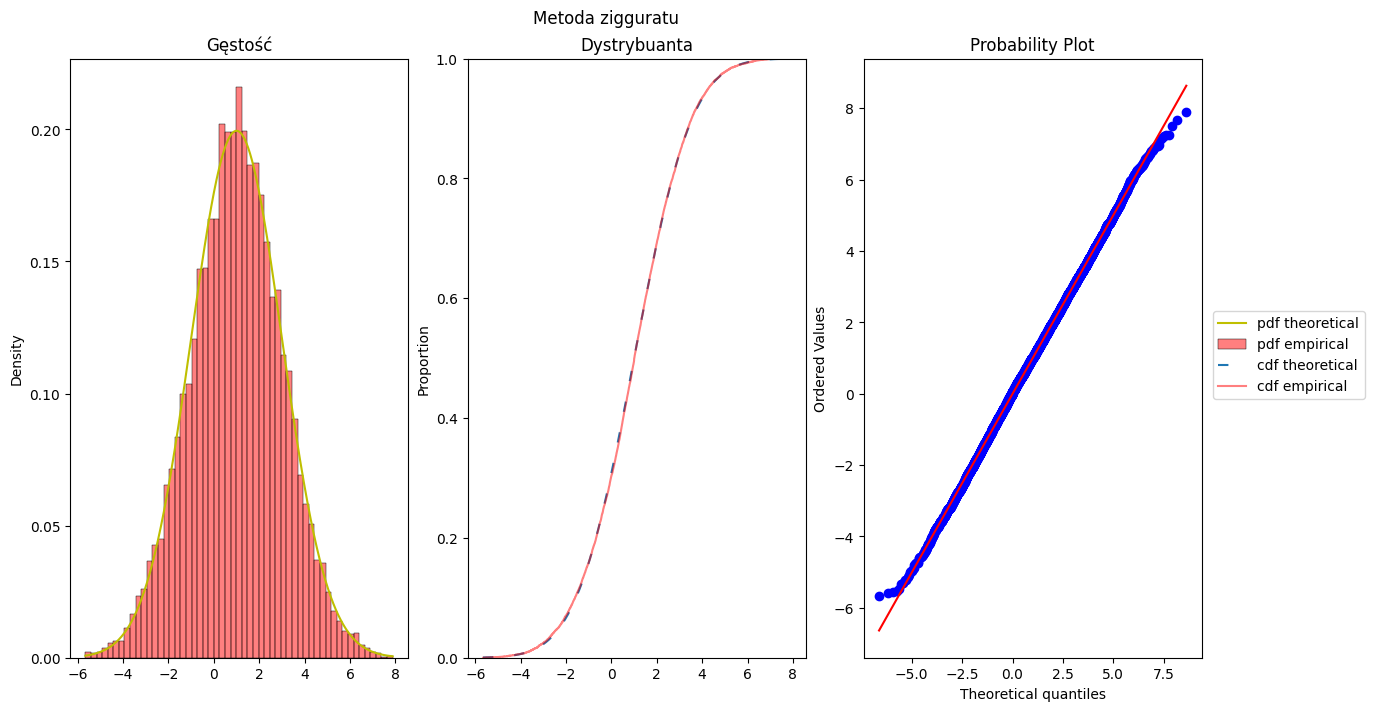

In [122]:
mu, sigma, n = 1, 2, 10000
X = ziggurat(n, mu, sigma)
print('----------------------------------- METODA ZIGGURATU -----------------------------------')
print('Expected value empirical:', np.average(X), 'Expected value Theoretical:', mu)
print('Variance empirical:', np.var(X), 'Variance Theoretical:', sigma**2)
fig, axes = plt.subplots(1, 3, layout="constrained")
val = np.unique(X)
axes[0].plot(
    val,
    stats.norm.pdf(val, loc=1, scale=2),
    c="y",
    label="pdf theoretical",
)
sns.histplot(
    X, stat="density", ax=axes[0], color="red", alpha=0.5, label="pdf empirical"
)
axes[1].plot(
    val,
    stats.norm.cdf(val, loc=1, scale=2),
    label="cdf theoretical",
    linestyle=(0, (5, 10)),
)
sns.ecdfplot(X, label="cdf empirical", color="red", alpha=0.5, ax=axes[1])
stats.probplot(X, dist="norm", sparams=(1, 2), plot=axes[2])
fig.suptitle("Metoda zigguratu")
axes[0].set_title('Gƒôsto≈õƒá')
axes[1].set_title('Dystrybuanta')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

W ostatniej metodzie analogicznie jak w poprzednich wyniki zosta≈Çy zweryfikowane za pomocƒÖ zestawie≈Ñ warto≈õci teoretycznych z wygenerowanymi. R√≥wnie≈º w tym przypadku warto≈õci siƒô pokry≈Çy.

### Test ilo≈õci razy obliczania funkcji wyk≈Çadniczej
W algorytmie, funkcjƒô¬†wyk≈ÇadniczƒÖ obliczamy tylko w przypadku gdy warto≈õƒá bezwzglƒôdna kandydata $x$ dla wylosowanego indeksu $i$ jest wiƒôksza od $x_{i+1}$, czyli $x$ nie mie≈õci siƒô w wylosowanym prostokƒÖcie. W tym przypadku sprawdzany jest warunek $y < f(x)$. Sprawdzimy teraz ile ≈õrednio razy mamy z nim do czynienia dla pr√≥bek rozmiaru $n=1000$.

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Liczba przypadk√≥w na 1000 generacji')

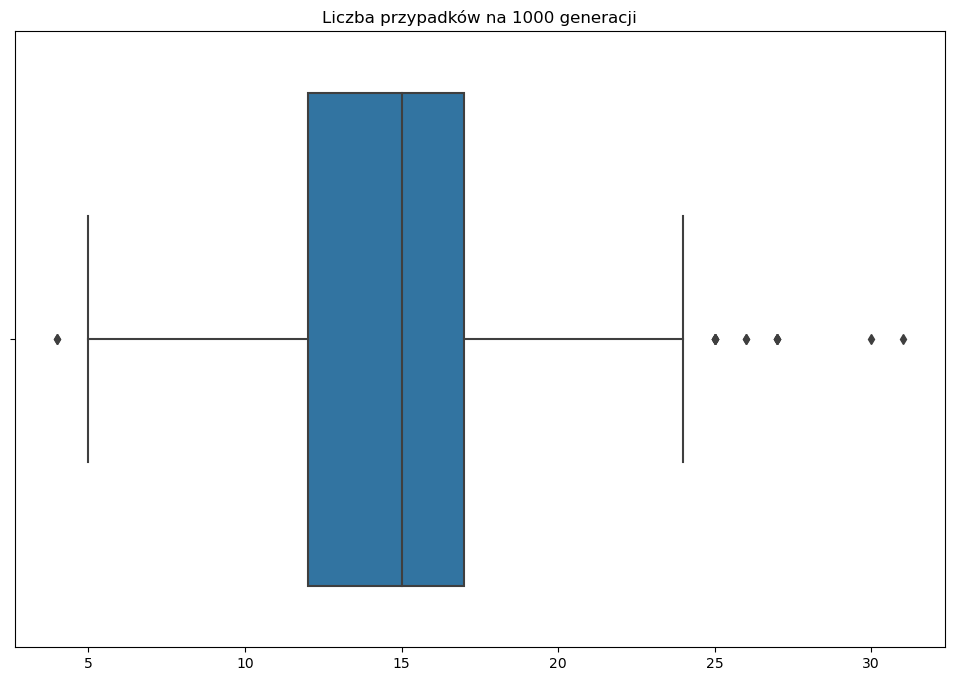

In [11]:
counts = np.zeros(1000)
for i in range(1000):
    counts[i] = ziggurat(1000, counter=True)
fig, ax = plt.subplots()
sns.boxplot(counts, ax=ax)
ax.set_title('Liczba przypadk√≥w na 1000 generacji')

Jak widaƒá na wykresie pude≈Çkowym powy≈ºej, przy generacji 1000 zmiennych losowych, ≈õrednio 15 razy algorytm wpada w przypadek, w kt√≥rym trzeba obliczyƒá eskponentƒô. Jednak w wiƒôkszo≈õci przypadk√≥w warto≈õƒá ta nie bƒôdzie przekraczaƒá 25.

### Por√≥wnanie efektywno≈õci algorytm√≥w
#### Czas wykonania algorytmu w zale≈ºno≈õci od wielko≈õci pr√≥by

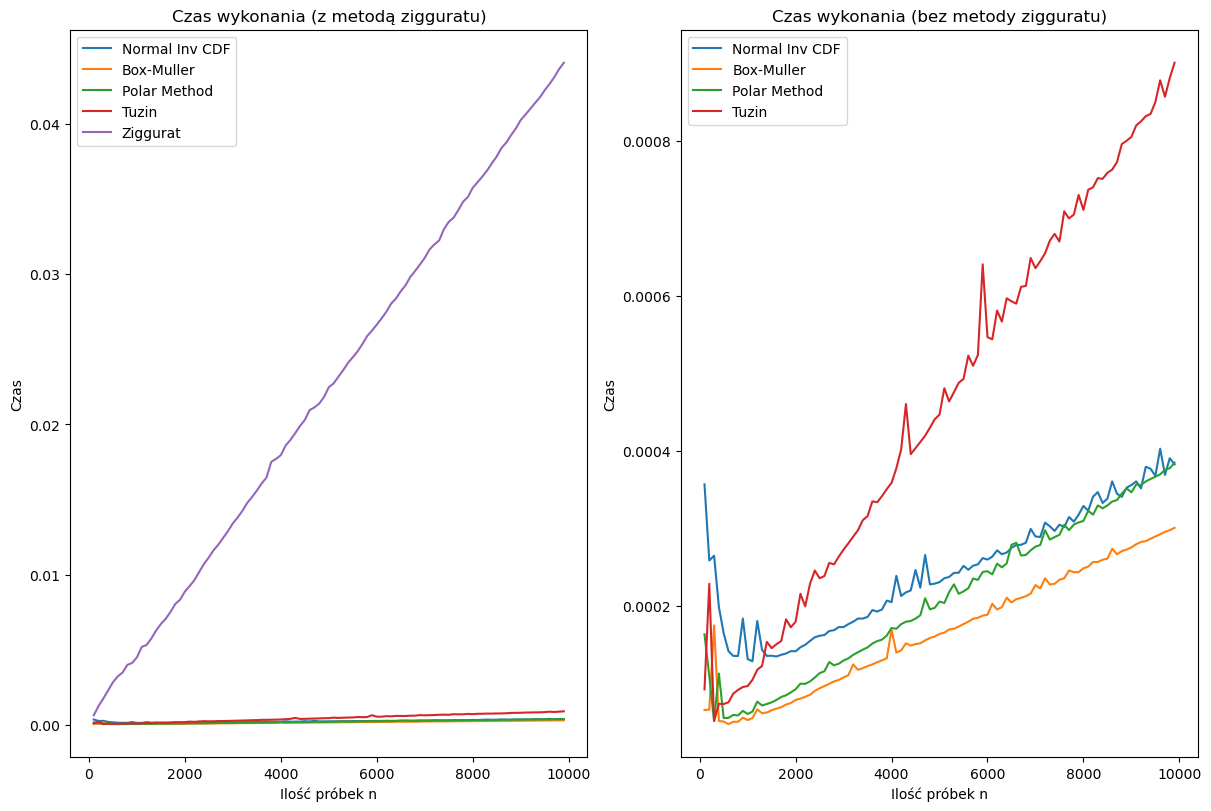

In [12]:
import time

ns = np.arange(100, 10000, 100)
times = np.zeros(shape=(np.size(ns), 5))
for i in range(len(ns)):
    start = time.time()
    norm_inv_cdf(ns[i])
    times[i, 0] = time.time() - start
    start = time.time()
    box_muller(ns[i])
    times[i, 1] = time.time() - start
    start = time.time()
    polar_method(ns[i])
    times[i, 2] = time.time() - start
    start = time.time()
    tuzin(ns[i])
    times[i, 3] = time.time() - start
    start = time.time()
    ziggurat(ns[i])
    times[i, 4] = time.time() - start

fig, axes = plt.subplots(ncols=2, layout="constrained")
axes[0].plot(ns, times[:, 0], label="Normal Inv CDF")
axes[0].plot(ns, times[:, 1], label="Box-Muller")
axes[0].plot(ns, times[:, 2], label="Polar Method")
axes[0].plot(ns, times[:, 3], label="Tuzin")
axes[0].plot(ns, times[:, 4], label="Ziggurat")
axes[0].set_title("Czas wykonania (z metodƒÖ¬†zigguratu)")
axes[0].set_xlabel("Ilo≈õƒá pr√≥bek n")
axes[0].set_ylabel("Czas")
axes[0].legend()
axes[1].plot(ns, times[:, 0], label="Normal Inv CDF")
axes[1].plot(ns, times[:, 1], label="Box-Muller")
axes[1].plot(ns, times[:, 2], label="Polar Method")
axes[1].plot(ns, times[:, 3], label="Tuzin")
axes[1].set_title("Czas wykonania (bez metody¬†zigguratu)")
axes[1].set_xlabel("Ilo≈õƒá¬†pr√≥bek n")
axes[1].set_ylabel("Czas")
axes[1].legend()
plt.show()

Czas wykonia algorytmu wykorzystujƒÖcego metodƒô zigguratu jest znaczƒÖco d≈Çu≈ºszy od czas√≥w dla pozosta≈Çych algorytm√≥w. Jest to spowodoawne faktem, ≈ºe jako jedyny nie zosta≈Ç zaimplementowany wektorowo. Metody biegunowa, odwrotnej dystrybuanty oraz Boxa-Muellera sƒÖ najszybsze. Natomiast czas generowania metodƒÖ tuzina lekko odstaje od tych trzech.

### Dok≈Çadno≈õƒá symulacji - test Kolomogorova-Smirnova

In [125]:
ks_statistic_method1, ks_pvalue_method1 = stats.kstest(norm_inv_cdf, 'norm')
ks_statistic_method2, ks_pvalue_method2 = stats.kstest(box_muller, 'norm')
ks_statistic_method3, ks_pvalue_method3 = stats.kstest(polar_method, 'norm')
ks_statistic_method4, ks_pvalue_method4 = stats.kstest(tuzin, 'norm')
ks_statistic_method5, ks_pvalue_method5 = stats.kstest(ziggurat, 'norm')

print(f"Normal Inv CDF K-S Test: statistic={ks_statistic_method1}, p-value={ks_pvalue_method1}\n")
print(f"Box-Mueller K-S Test: statistic={ks_statistic_method2}, p-value={ks_pvalue_method2}\n")
print(f"Polar Method K-S Test: statistic={ks_statistic_method3}, p-value={ks_pvalue_method3}\n")
print(f"Tuzin K-S Test: statistic={ks_statistic_method4}, p-value={ks_pvalue_method4}\n")
print(f"Ziggurat K-S Test: statistic={ks_statistic_method5}, p-value={ks_pvalue_method5}\n")

Normal Inv CDF K-S Test: statistic=0.0838915309386381, p-value=0.9966939108571323

Box-Mueller K-S Test: statistic=0.11856710907884332, p-value=0.9103370420813638

Polar Method K-S Test: statistic=0.11086809964185487, p-value=0.9439393437100231

Tuzin K-S Test: statistic=0.15662382753575788, p-value=0.6542324867783329

Ziggurat K-S Test: statistic=0.14539349925218215, p-value=0.7388234188636461



Dla domy≈õlnych 20 realizacji zmiennych losowych przeprowadzili≈õmy test Kolmogorova-Smirnova przy u≈ºyciu funkcji $scipy.stats.kstest$. Statysyka testowa dla ka≈ºdego z generator√≥w jest rzƒôdu $10^{-1}$. P-warto≈õci r√≥wnie≈º sƒÖ na podobnym poziomie. BiorƒÖc pod uwagƒô poziom istotno≈õci testu $\alpha = 0.05$, nie mamy przes≈Çanek do odrzucenia hipotezy zerowej ($H_0$ - realizacje pochodzƒÖ z rozk≈Çadu normalnego) dla ≈ºadnego z generator√≥w.

## 3: Metody redukcji wariancji

### Cel
Celem zadania jest zbadanie i por√≥wnanie metod redukcji wariancji dla estymacji warto≈õci liczby œÄ za pomocƒÖ metody zmiennej kontrolnej (Control Variates) oraz metody odbiƒá lustrzanych (Antithetic Variates).

### RozwiƒÖzanie
Na poczƒÖtku chcemy wykonaƒá szacowanie liczby $\pi$ przy u≈ºyciu metody Monte Carlo. W zwiƒÖzku z tym generujemy $n$  zmiennych losowych z rozk≈Çadu  jednostajnego na przedziale [0, 1]. Nastƒônie obliczamy ≈õredniƒÖ warto≈õƒá funkcji $\frac{1}{1 + x^2}$ dla wszystkich wygenerowanych $Xs$. Przy takim szacowaniu wiƒôksza liczba $n$ oznacza dok≈Çadniejsze oszacowanie.

In [3]:
def monte_carlo(n):
    """
    Szacuje warto≈õƒá liczby pi za pomocƒÖ metody Monte Carlo.

    :param n: (int) liczba losowych pr√≥bek do wygenerowania
    :return: (float) oszacowana warto≈õƒá liczby pi
    """
    Xs = np.random.uniform(size=n)  
    return 4 * np.sum(1 / (1 + Xs ** 2)) / n

In [127]:
ns = [10, 100, 1000, 10000, 100000, 1000000]
for n in ns:
    pi = monte_carlo(n)
    print(pi)

2.988919053255297
3.130780568411291
3.1235093240884355
3.1324839440631056
3.1398723562643562
3.1418804121449893


Ostatni widoczny powy≈ºej wynik najlepiej przybli≈ºa warto≈õƒá liczby $\pi$. ≈öwiadczy to o poprawno≈õci stwierdzenia dotyczƒÖcego wzrostu dok≈Çadno≈õci wyniku w momencie zwiƒôkszenia warto≈õci $n$.

### Metoda zmiennej kontrolnej
Przejd≈∫my do metody zmiennej kontrolnej. Jest to technika u≈ºywana w metodach Monte Carlo w celu zmniejszenia wariancji estymator√≥w oraz poprawy precyzji wynik√≥w. Idea tego pomys≈Çu polega na wprowadzeniu dodatkowej zmiennej losowej, kt√≥rej warto≈õƒá oczekiwana jest znana i zbli≈ºona do warto≈õci oczekiwanej zmiennej, kt√≥rƒÖ chcemy estymowaƒá. Poprzez korelacjƒô miƒôdzy tymi zmiennymi, mo≈ºna uzyskaƒá dok≈Çadniejsze estymacje. Natomiast sta≈Ça $c$ jest wsp√≥≈Çczynnikiem, kt√≥ry kontroluje wp≈Çyw tej zmiennej na estymacjƒô.

#### Wyznaczanie sta≈Çej "c"
Aby analitycznie wyliczyƒá wsp√≥≈Çczynnik $c$, musimy znale≈∫ƒá warto≈õci $\text{Cov}(f(X), g(X))$ oraz $\text{Var}(g(X))$, gdzie $X$ jest zmiennƒÖ losowƒÖ o rozk≈Çadzie jednostajnym na przedziale $[0, 1]$.

Zdefiniujmy zatem funkcje:
\begin{align*}
f(x) &= \frac{4}{1 + x^2}, \\ g(x) &= x. 
\end{align*}
Teraz obliczmy ich warto≈õci oczekiwane:
\begin{align*}
\mathbb{E}[f(X)] &= \pi \\  \mathbb{E}[g(X)] &= \mathbb{E}[X] = \frac{1}{2}
\end{align*}
Aby wyliczyƒá warto≈õƒá kowariancji wykonali≈õmy poni≈ºsze przekszta≈Çcenia.
\begin{align*} \text{Cov}(f(X), g(X)) = \mathbb{E}[f(X) \cdot g(X)] - \mathbb{E}[f(X)] \cdot \mathbb{E}[g(X)] = 2 \ln(2) - \frac{\pi}{2}  \end{align*}
Nastƒôpnie 
\begin{align*} \text{Var}(g(X)) = \mathbb{E}[g(X)^2] - (\mathbb{E}[g(X)])^2 = \frac{1}{12}. \end{align*}

Zatem korzystajƒÖc z powy≈ºszego mo≈ºemy ju≈º wyznaczyƒá sta≈ÇƒÖ $c$:

\begin{align*} c = -\frac{\text{Cov}(f(X), g(X))}{\text{Var}(g(X))} = -\frac{2 \ln(2) - \frac{\pi}{2}}{\frac{1}{12}} = -12 (2 \ln(2) - \frac{\pi}{2}) = -24 \ln(2) + 6 \pi. \end{align*} 
Na podstawie tak wyznaczonej warto≈õci mo≈ºemy obliczyƒá warto≈õƒá numerycznƒÖ zmiennej. 

In [4]:
c_a = -24*np.log(2) + 6*np.pi
print("Sta≈Ça c wyznaczona analitycznie:", c_a)

Sta≈Ça c wyznaczona analitycznie: 2.2140235881000727


Jedank w omawianym zadaniu wyestymujemy warto≈õci sta≈Çej $c$. W tym celu powt√≥rzymy kroki z rozwiƒÖzania analitycznego dla wygenrowanej pr√≥bki

In [12]:
n_c = 100
x_c = np.random.uniform(size=n_c)
f_vals = 4 / (1 + x_c**2)
g_vals = x_c
f_mean = np.mean(f_vals)
g_mean = np.mean(g_vals)
cov = np.mean((f_vals - f_mean) * (g_vals - g_mean))
var = np.var(g_vals)
c = -cov / var
print("Sta≈Ça c wyznaczona symulacyjnie:", c)

Sta≈Ça c wyznaczona symulacyjnie: 2.2172737734554646


Jak mo≈ºemy zauwa≈ºyƒá, wyniki estymowane oraz teoretyczne przyjmujƒÖ podobne warto≈õci. 

Aby otrzymaƒá skorygowanƒÖ estymatƒô liczby $\pi$, wykorzystujemy zmiennƒÖ kontrolnƒÖ. Takie dzia≈Çanie ma funkcja zaimplementowana poni≈ºej control_variates. Wykorzystuje ona dodatkowƒÖ funkcje kontrolnƒÖ (w tym przypadku wybrali≈õmy g(x) = x), kt√≥rej warto≈õƒá oczekiwana jest znana i wynosi $\frac{1}{2}$, a tak≈ºe wyliczonƒÖ wcze≈õniej warto≈õƒá $c$ do zmniejszenia wariancji g≈Ç√≥wnej funkcji $f(x)$



In [8]:
def control_variates(n, c):
   """
    Szacuje warto≈õƒá liczby pi za pomocƒÖ metody wariant√≥w kontrolnych (Control Variates).

    :param n: (int) liczba losowych pr√≥bek do wygenerowania
    :param c: (float) zmienna kontrolna
    :return: (float) oszacowana warto≈õƒá liczby pi
   """
   Xs = np.random.uniform(size=n)  # Generowanie n losowych pr√≥bek z rozk≈Çadu jednostajnego na przedziale [0, 1]
   f = lambda x: 4 / (1 + x ** 2)  # Funkcja f(x) do oszacowania warto≈õci pi
   g = lambda x: x # Dodatkowa funkcja
    
   g_mean = np.mean(g(Xs))  # ≈örednia warto≈õƒá g(x)
   f_mean = np.mean(f(Xs))  # ≈örednia warto≈õƒá f(x)
    
   return f_mean + c * (g_mean - 0.5)  

### Metoda odbiƒá lustrzanych
Przejd≈∫my do metody odbiƒá lustrzanych. W tradycyjnej metodzie Monte Carlo estymujemy warto≈õƒá oczekiwanƒÖ funkcji poprzez losowanie niezale≈ºnych pr√≥bek i u≈õrednianie ich warto≈õci. Metoda odbiƒá lustrzanych zamiast tego wykorzystuje parƒô pr√≥bek $(Xs[i], 1 - Xs[i])$, kt√≥re sƒÖ silnie skorelowane (symetryczne wzglƒôdem 0.5). Dziƒôki temu, gdy ≈ÇƒÖczymy warto≈õci funkcji obliczone dla $Xs$ i $1 - Xs$, r√≥≈ºnice miƒôdzy nimi siƒô wzajemnie kompensujƒÖ, co zmniejsza ca≈ÇkowitƒÖ wariancjƒô estymatora.

In [10]:
def antithetic_variates(n):
    """
    Szacuje warto≈õƒá liczby pi za pomocƒÖ metody wariant√≥w przeciwstawnych (Antithetic Variates).

    :param n: (int) liczba losowych pr√≥bek do wygenerowania, powinna byƒá parzysta
    :return: (float) oszacowana warto≈õƒá liczby pi
    """
    Xs = np.random.uniform(size=n//2)  # Generowanie n/2 losowych pr√≥bek z rozk≈Çadu jednostajnego na przedziale [0, 1]
    Xs = np.concatenate((Xs, 1 - Xs))  # Dodawanie pr√≥bek przeciwstawnych
    return np.mean(4 / (1 + Xs ** 2))  


Wykonamy teraz symulacje dla r√≥≈ºnych liczno≈õci pr√≥bek n, aby por√≥wnaƒá ich efektywno≈õƒá i dok≈Çadno≈õƒá w estymacji liczby œÄ.

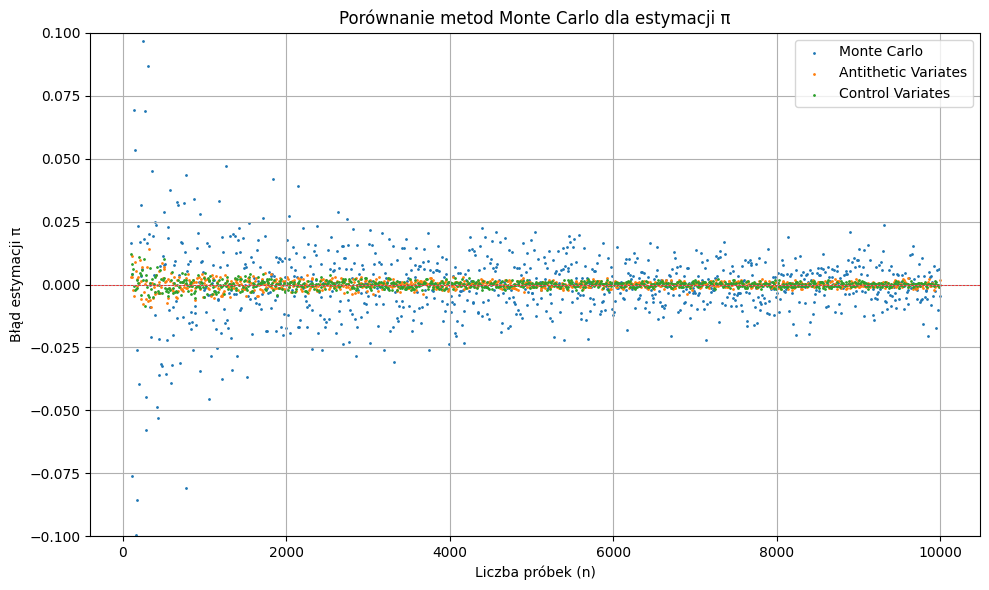

In [11]:
ns = np.arange(100, 10000, 10)
vals = np.zeros(shape=(4,len(ns)))
i = 0
for n in ns:
    vals[0, i] = monte_carlo(n)
    vals[1, i] = antithetic_variates(n)
    vals[2, i] = control_variates(n, c)
    vals[3, i] = control_variates(n, c_a)
    i += 1
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(ns, vals[0, :] - np.pi, label='Monte Carlo', s=1)
ax.scatter(ns, vals[1, :] - np.pi, label='Antithetic Variates', s=1)
ax.scatter(ns, vals[2, :] - np.pi, label='Control Variates', s=1)
# ax.plot(ns, ns*[np.pi])

ax.axhline(y=0, color='r', linestyle='--', linewidth=0.5)  # linia referencyjna dla warto≈õci œÄ
ax.set_xlabel('Liczba pr√≥bek (n)')
ax.set_ylabel('B≈ÇƒÖd estymacji œÄ')
ax.set_title('Por√≥wnanie metod Monte Carlo dla estymacji œÄ')
ax.legend()
ax.set_ylim(-0.1, 0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

Mo≈ºemy zauwa≈ºyƒá, ≈ºe wraz ze wzrostem $n$ wariancja zmniejsza siƒô dla ka≈ºdej z omawianych metod. Dodatkowo, wykres potwierdza skuteczno≈õƒá dw√≥ch zaimplementowanych modeli, poniewa≈º rozproszenie estymowanej warto≈õci $\pi$ jest mniejsze w por√≥wnaniu do klasycznej metody Monte Carlo.

### Wykresy skrzypcowe

Funkcja sns.violinplot z biblioteki Seaborn w Pythonie s≈Çu≈ºy do wizualizacji rozk≈Çadu danych numerycznych. Jest to rodzaj wykresu skrzypcowego, kt√≥ry pozwala na jednoczesne por√≥wnanie rozk≈Çadu danych w r√≥≈ºnych kategoriach.

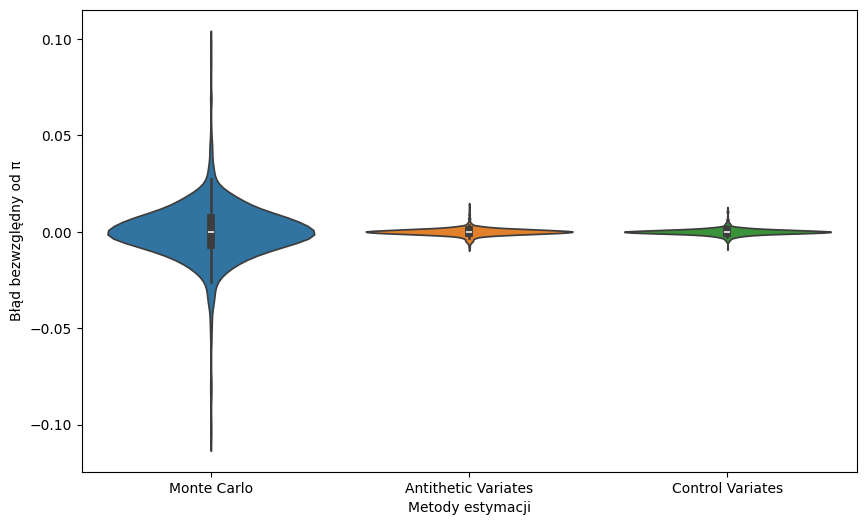

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.violinplot(data=vals[:3].T - np.pi, ax=ax)

ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Monte Carlo', 'Antithetic Variates', 'Control Variates'])

ax.set_ylabel('B≈ÇƒÖd bezwzglƒôdny od œÄ')
ax.set_xlabel('Metody estymacji')

plt.show()

Na wykresach skrzypcowych mo≈ºemy zobaczyƒá rozk≈Çad b≈Çƒôd√≥w estymacji liczby œÄ dla r√≥≈ºnych metod. Skrzyd≈Ço skrzypca reprezentuje rozk≈Çad danych w ka≈ºdej kategorii, a im szersze skrzyd≈Ço, tym wiƒôcej danych znajduje siƒô w tej czƒô≈õci rozk≈Çadu. D≈Çugo≈õƒá skrzyd≈Ça wskazuje zakres warto≈õci danych. Metoda Monte Carlo ma szerszy rozk≈Çad, co sugeruje wiƒôkszƒÖ zmienno≈õƒá wynik√≥w. Antithetic Variates i Control Variates majƒÖ wƒô≈ºsze rozk≈Çady, co wskazuje na wiƒôkszƒÖ precyzjƒô tych metod.

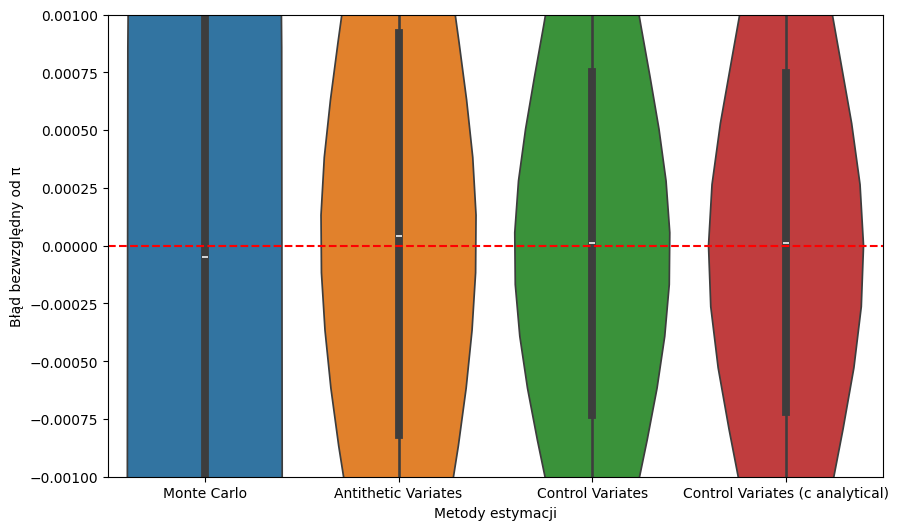

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.violinplot(data=vals.T - np.pi, ax=ax)

ax.set_xticks(np.arange(4))
ax.set_xticklabels(['Monte Carlo', 'Antithetic Variates', 'Control Variates', 'Control Variates (c analytical)'])

ax.set_ylabel('B≈ÇƒÖd bezwzglƒôdny od œÄ')
ax.set_xlabel('Metody estymacji')
ax.set_ylim(-0.001, 0.001)
ax.axhline(0, color='red', linestyle='--')
plt.show()

Linia ≈õrodkowa wewnƒÖtrz skrzypca to mediana rozk≈Çadu danych dla poszczeg√≥lnej metody. Grube linie wewnƒÖtrz skrzypca reprezentujƒÖ rozstƒôp miƒôdzykwartylowy. W metodzie zmiennych kontrolnych ten rozstƒôp jest mniejszy, co oznacza, ≈ºe wiƒôksza ilo≈õƒá warto≈õci znajduje siƒô bli≈ºej oczekiwanej warto≈õci $\pi$. Oznacza to, ≈ºe jest ona efektywniejsza od metody odbiƒá lustrzanych. Na wykresie zosta≈Ç dodatkowo umieszczony wykres metody zmiennych kontrolnych dla $c$ wyliczonego analitycznie. Mo≈ºemy zauwa≈ºyƒá, ≈ºe dla takiego $c$ metoda redukcji wariancji jest skuteczniejsza.

## 4: Warunkowa warto≈õƒá oczekiwana

### Cel
Czwarty rozwa≈ºany problem jest zwiƒÖzany z warunkowƒÖ warto≈õciƒÖ oczekiwanƒÖ. Rozwa≈ºymy tu trzy odrƒôbne sytuacje w kt√≥rych celem bƒôdzie wyestymowanie warto≈õci oczekiwanych danych zdarze≈Ñ oraz zestawienie ich z warto≈õciami teoretycznymi.

### RozwiƒÖzanie
Jako pierwszƒÖ rozwa≈ºymy sytuacjƒô kt√≥ra m√≥wi nam, ≈ºe je≈õli $X, Y$ sƒÖ zmiennymi niezale≈ºnymi a $E(Y) = 0$, to dla $Z=XY + sinX$ zachodzi $E(Z|X) = sin X$. 

Aby dok≈Çadnie zrozumieƒá rozwiƒÖzanie musimy odpowiedzieƒá na pytanie w jaki spos√≥b definiujemy warto≈õƒá oczekiwanƒÖ zmiennej losowej. OdpowiadajƒÖc, jest to ≈õrednia, wa≈ºona prawdopodobie≈Ñstwem, warto≈õci zmiennej losowej. Co za tym idzie estymatorem warto≈õci oczekiwanej jest ≈õrednia arytmetyczna. Zatem warunkowƒÖ warto≈õƒá oczekiwanƒÖ mo≈ºemy estymowaƒá poprzez symulowanie $n$ warto≈õci z rozk≈Çadu $N \sim (0,1)$, a nastƒôpnie wyznaczenie warto≈õci zmiennej $Z$ dla kolejnych warto≈õci $X$ oraz ≈õredniej arytmetycznej z wyznaczonych warto≈õci $Y$. 

ChcƒÖc wykonaƒá opisane dzia≈Çanie zacznijamy od zdefiniowanych przyk≈Çadowych parametr√≥w oraz wygenerujmy $n$ zmiennych $X$ oraz $Y$.

In [136]:
n = 1000
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)

Nastƒôpnie zdefiniujmy generowane zmienne losowe $Z$, warto≈õci estymowane $Z$ oraz warto≈õci teoretyczne. Tak obliczone warto≈õci zostanƒÖ przedstawione na wykresie w celu wizualizacji. 

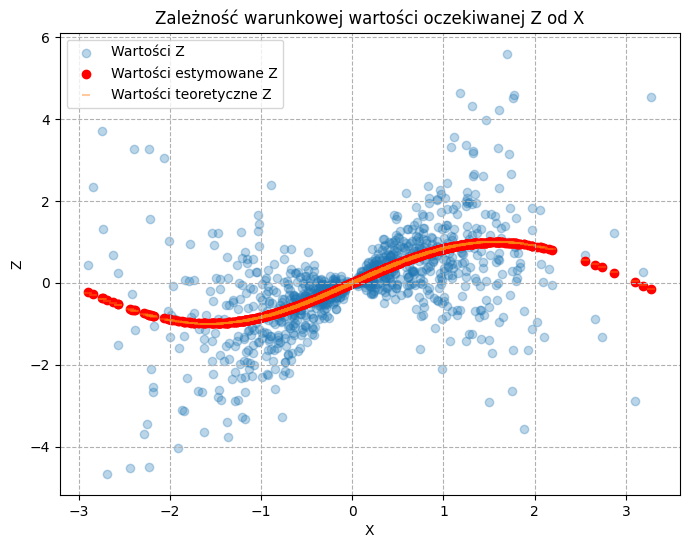

In [137]:
Z = X * Y + np.sin(X)
estymowane_Z = X * np.mean(Y) + np.sin(X)
theo_EZ = np.sin(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, Z, alpha=0.3, label='Warto≈õci Z')
plt.scatter(X, estymowane_Z, color='red', label='Warto≈õci estymowane Z')
plt.scatter(X, theo_EZ, alpha=0.4, marker='_', label='Warto≈õci teoretyczne Z')
plt.xlabel('X')
plt.ylabel('Z')
plt.legend()
plt.grid(linestyle="--")
plt.title('Zale≈ºno≈õƒá warunkowej warto≈õci oczekiwanej Z od X')
plt.show()


Jak mo≈ºna zauwa≈ºyƒá na grafie warto≈õci estymowane oraz teortyczne siƒô pokrywajƒÖ, co mo≈ºe ≈õwiadczyƒá o poprawno≈õci metody. Natomiast b≈Çƒôkitne punkty reprezentujƒÖ zmienne Z wyliczone dla ka≈ºdej mo≈ºliwej pary $(X, Y)$. Mo≈ºe to prowadziƒá do wniosk√≥w, ≈ºe przyjƒôty i rozwa≈ºony estymator warto≈õci oczekiwanej (tu ≈õrednia arytmetyczna) jest poprawnie zdefiniowanƒÖ statystykƒÖ.

KolejnƒÖ rozwa≈ºanƒÖ sytuacjƒÖ jest w≈Çasno≈õƒá m√≥wiƒÖca, ≈ºe gdy N jest procesem Poissona o intensywnosci $\lambda$, to dla T ‚â• t ‚â• 0 zachodzi $E(Nt|NT ) = tNT/T$ . Oznacza to, ≈ºe np. zak≈ÇadajƒÖc przybywanie klient√≥w do sklepu zgodnie z procesem Poissona i majƒÖc dane na temat dotychczasowej ilo≈õci klient√≥w w sklepie w chwili $T$ (czyli $NT$ ), to najlepszym przybli≈ºeniem dotychczasowej chwili
klient√≥w w chwili $t < T$ r√≥wnej $Nt$ jest $tNT /T$.

By zweryfikowaƒá te w≈Çasno≈õƒá znowu pos≈Çu≈ºymy siƒô estymatorem jakim jest ≈õrednia arytmetyczna. Jednak jako ≈ºe mamy do czynienia z procesem Poissona bƒôdzie konieczne wygenerowanie $n$ trajektorii a nastƒôpnie obliczenie ≈õredniej z osiƒÖgniƒôtych warto≈õci w ka≈ºdym punkcie czasu $t<T$. Zacznijmy od napisania funkcji do generowania trajektorii z rozk≈Çadu Poissona.

In [138]:
def poisson_traj(T: float, num_trajectories: int, lam: float) -> typing.Tuple[np.ndarray, np.ndarray]:
    """
    Generuje trajektorie procesu Poissona.

    Args:
        T (float): Ca≈Çkowity czas trwania symulacji.
        num_trajectories (int): Liczba trajektorii do wygenerowania.
        lam (float): Intensywno≈õƒá procesu Poissona.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Zwraca krotkƒô zawierajƒÖcƒÖ tablicƒô warto≈õci czasu (t_values) 
        oraz dwuwymiarowƒÖ tablicƒô trajektorii (trajectories).
    """
    dt = 0.01
    t_values = np.arange(0, T + dt, dt)
    num_steps = len(t_values)
    
    trajectories = np.zeros((num_trajectories, num_steps))
    
    for i in range(num_trajectories):
        for t in range(1, num_steps):
            trajectories[i, t] = trajectories[i, t-1] + np.random.poisson(lam * dt)  
    return t_values, trajectories

Teraz by z ≈Çatwo≈õciƒÖ wyliczyƒá ≈õredniƒÖ intensywno≈õƒá trajektorii procesu Poissona dla zadanego czasu T zadeklarujemy odpowiedniƒÖ funkcje. ≈örednia intensywno≈õƒá bƒôdzie wyliczana jako ≈õrednia liczba zdarze≈Ñ w czasie dla wszystkich trajektorii.

In [139]:
def calculate_average_intensity(trajectories: np.ndarray, T: float) -> typing.Tuple[np.ndarray, np.ndarray]:
    """
    Oblicza ≈õredniƒÖ intensywno≈õƒá trajektorii procesu Poissona.

    Args:
        trajectories (np.ndarray): Dwuwymiarowa tablica zawierajƒÖca trajektorie procesu Poissona.
        T (float): Ca≈Çkowity czas trwania symulacji.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Zwraca krotkƒô zawierajƒÖcƒÖ tablicƒô warto≈õci czasu (t_values) 
        oraz ≈õredniƒÖ intensywno≈õƒá (average_Nt_over_T) dla ka≈ºdej chwili czasu.
    """
    num_trajectories, num_steps = trajectories.shape
    t_values = np.linspace(0, T, num_steps)
    average_Nt = np.mean(trajectories, axis=0)
    return t_values, average_Nt

ChcƒÖc zweryfikowaƒá poprawno≈õƒá metody wywo≈Çajmy funkcje dla przyk≈Çadowych parametr√≥w $T=1, n=1000, \lambda = 10$ oraz przedstawmy wyniki na wykresie.

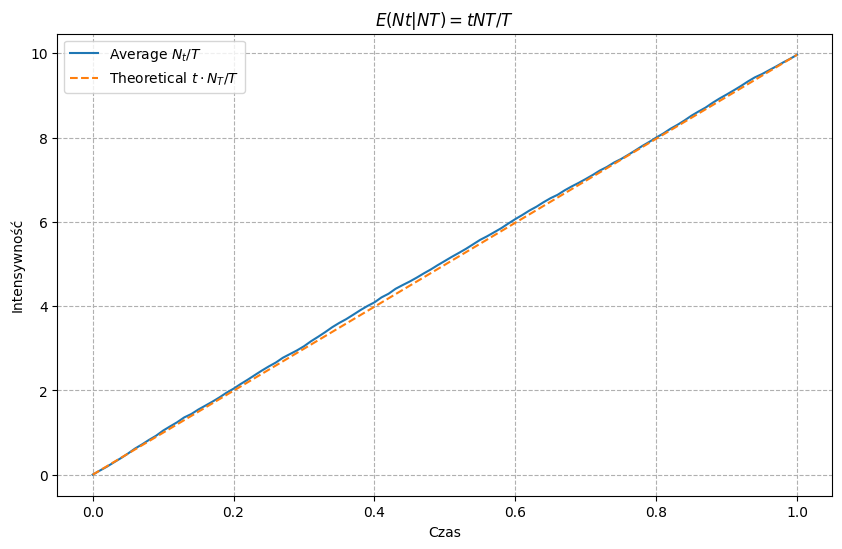

In [140]:
T = 1
num_trajectories = 1000
lam = 10
t_values, trajectories = poisson_traj(T, num_trajectories, lam)
t_values, average_intensity = calculate_average_intensity(trajectories, T)

#Obliczenie warto≈õci teoretycznych
N_T = np.mean(trajectories[:, -1])
theo = t_values * N_T / T

plt.figure(figsize=(10, 6))
plt.plot(t_values, average_intensity, label='Average $N_t/T$')
plt.plot(t_values, theo, label='Theoretical $t \cdot N_T / T$', linestyle='--')
plt.xlabel('Czas')
plt.ylabel('Intensywno≈õƒá')
plt.title('$E(Nt|NT ) = tNT/T$')
plt.legend()
plt.grid(linestyle="--")
plt.show()

Powy≈ºszy wykres potwierdza poprawno≈õƒá metody. Warto≈õci estymowane pokrywajƒÖ siƒô z teoretycznymi. Widoczne sƒÖ jedynie niewielkie odchylenia kt√≥re mogƒÖ wynikaƒá z pseudolosowo≈õci generowanych trajektorii.

Ostatnim problemem dotyczƒÖcym warunkowej warto≈õci oczekiwanej jest stwierdzenie poprawno≈õci nastƒôpujƒÖcego wyra≈ºenia. Gdy N jest procesem Poissona o intensywno≈õci $\lambda$, to dla $t ‚â• s ‚â• 0$ zachodzi $E(Nt|Fs) = Ns + \lambda(t ‚àí s)$, gdzie
$Fs$ to filtracja naturalna procesu $Ns$. Oznacza to, ≈ºe np. zak≈ÇadajƒÖc przybywanie klient√≥w do sklepu zgodnie z
procesem Poissona i majƒÖc dane na temat dotychczasowej ilo≈õci klient√≥w w sklepie w ka≈ºdej chwili œâ spe≈ÇniajƒÖcej
$0 ‚â§ \omega ‚â§ s$ (czyli $Fs$), to najlepszym przybli≈ºeniem dotychczasowej chwili klient√≥w w chwili $t ‚â•$ s jest $Ns+\lambda(t‚àís)$.

W celu weryfikacji tego wygenerujemy trajektorie korzystajƒÖc z wcze≈õniej zaimplementowanej funkcji poisson_traj. A nastƒôpnie od miejsca $t=s$ wygenerujemy kolejne trajektorie i z nich wyliczymy warto≈õƒá ≈õredniƒÖ w odpowiednich miejscach czasowych. W tym rozwiƒÖzaniu korzystamy z w≈Çasno≈õci Markowa kt√≥ra m√≥wi, ≈ºe przysz≈Çe zmiany procesu sƒÖ niezale≈ºne od przesz≈Ço≈õci, o ile znamy obecny stan.

Wywo≈ÇujƒÖc funkcjƒô przyjmiemy warto≈õci parametr√≥w $s=1, \lambda=1, T=20$ oraz $n=1000$.

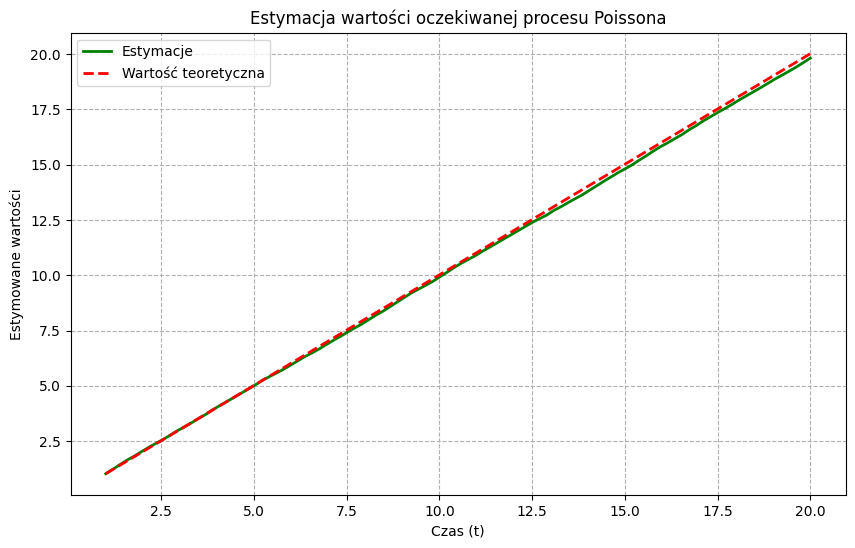

In [141]:
s = 1
lam = 1
T = 20
num_simulations = 1000

t_values, trajectories = poisson_traj(T, num_simulations, lam)

dt = 0.01
idx_s = int(s / dt)
Ns = trajectories[:, idx_s].mean()

times_for_estimation = np.linspace(s, T, 100)
estimations = []

for t in times_for_estimation:
    idx_t = int(t / dt)
    Nt = trajectories[:, idx_t]
    estimation = Nt.mean()
    estimations.append(estimation)

plt.figure(figsize=(10, 6))
plt.plot(times_for_estimation, estimations, label='Estymacje', color='g', linewidth=2)
plt.plot(times_for_estimation, Ns + lam * (times_for_estimation - s), label='Warto≈õƒá teoretyczna', color='r', linestyle='--', linewidth=2)
plt.xlabel('Czas (t)')
plt.ylabel('Estymowane warto≈õci')
plt.title('Estymacja warto≈õci oczekiwanej procesu Poissona')
plt.legend()
plt.grid(linestyle="--")
plt.show()

Korzystanie z w≈Çasno≈õci Marowa w rzeczywisty spos√≥b odzwierciedla warto≈õci teoretyczne. Potwierdza to poprawno≈õƒá u≈ºytej metody generacji. 

## 5: Czas ruiny

### Cel
Celem zadania jest analiza i szacowanie prawdopodobie≈Ñstwa ruiny w ubezpieczeniowym modelu ryzyka, bazujƒÖcym na procesie Poissona. Model ten jest u≈ºywany do okre≈õlania prawdopodobie≈Ñstwa, ≈ºe kapita≈Ç ubezpieczyciela spadnie poni≈ºej zera w danym okresie. Przeprowadzimy symulacje stochastyczne oraz por√≥wnamy wyniki z teoretycznymi warto≈õciami uzyskanymi za pomocƒÖ wzoru Pollaczka-Chinczyna:
\begin{equation*}
\psi(u, c)=\frac{\eta \lambda}{c}e^{-(\frac{1}{\eta}-\frac{\lambda}{c})u}
\end{equation*}
oraz dla funkcji odrwotnej.

### RozwiƒÖzanie
Zacznijmy od zdefiniowania funkcji potrzebnych do wykonania zadania. ZostanƒÖ one kolejno om√≥wione poni≈ºej.

In [2]:
def estimate_psi(u, c, lamb, eta, T, N):
    """
    Szacuje warto≈õƒá psi za pomocƒÖ symulacji stochastycznych.

    :param u: (float) poczƒÖtkowy kapita≈Ç
    :param c: (float) sta≈Ça stawka wp≈Çat
    :param lamb: (float) intensywno≈õƒá procesu Poissona
    :param eta: (float) parametr skali rozk≈Çadu wyk≈Çadniczego
    :param T: (float) czas trwania
    :param N: (int) liczba symulacji
    :return: (float) oszacowana warto≈õƒá psi, czyli prawdopodobie≈Ñstwo ruiny
    """
    r = 0
    for _ in range(N):
        n = stats.poisson.rvs(mu=lamb * T)  # Losowanie liczby zdarze≈Ñ z rozk≈Çadu Poissona
        if n == 0:
            continue
        Us = T * np.random.uniform(size=n)  # Generowanie losowych czas√≥w zdarze≈Ñ
        Us = np.sort(Us)  # Sortowanie czas√≥w zdarze≈Ñ
        X = np.random.exponential(scale=eta, size=n)  # Generowanie strat z rozk≈Çadu wyk≈Çadniczego
        R_t = u + c * Us - np.cumsum(X)  # Obliczanie kapita≈Çu w kolejnych momentach czasu
        if np.any(R_t < 0):  # Sprawdzanie, czy kapita≈Ç kiedykolwiek spad≈Ç poni≈ºej zera
            r += 1
    return r / N  # Oszacowanie prawdopodobie≈Ñstwa ruiny

Funkcja estimate_psi szacuje prawdopodobie≈Ñstwo ruiny przy u≈ºyciu symulacji stochastycznych. Dla ka≈ºdej symulacji losujemy liczbƒô zdarze≈Ñ z procesu Poissona, generujemy losowe czasy zdarze≈Ñ oraz losowe warto≈õci strat. Nastƒôpnie obliczamy kapita≈Ç w kolejnych momentach czasu i sprawdzamy, czy kiedykolwiek spad≈Ç poni≈ºej zera. Wynik to stosunek liczby przypadk√≥w, w kt√≥rych kapita≈Ç spad≈Ç poni≈ºej zera, do ca≈Çkowitej liczby symulacji.

In [8]:
def find_c(u, psi, lambd, eta, T, num_simulations=1000, tol=1e-6, max_iter=100):
    """
    Znajduje warto≈õƒá c, kt√≥ra spe≈Çnia dane prawdopodobie≈Ñstwo psi za pomocƒÖ metody podzia≈Çu i poszukiwania (divide and conquer).

    :param u: (float) poczƒÖtkowy kapita≈Ç
    :param psi: (float) docelowe prawdopodobie≈Ñstwo ruiny
    :param lambd: (float) intensywno≈õƒá procesu Poissona
    :param eta: (float) parametr skali rozk≈Çadu wyk≈Çadniczego
    :param T: (float) czas trwania
    :param num_simulations: (int) liczba symulacji dla ka≈ºdej iteracji (domy≈õlnie 1000)
    :param tol: (float) tolerancja b≈Çƒôdu przy por√≥wnywaniu psi_est z psi (domy≈õlnie 1e-2)
    :param max_iter: (int) maksymalna liczba iteracji (domy≈õlnie 100)
    :return: (float) oszacowana warto≈õƒá c, kt√≥ra spe≈Çnia dane prawdopodobie≈Ñstwo psi
    """
    low, high = 0, 5  # PoczƒÖtkowy zakres dla c
    for _ in range(max_iter):
        # print(_)
        mid = (low + high) / 2  # Obliczanie ≈õrodka zakresu
        psi_est = estimate_psi(u, mid, lambd, eta, T, num_simulations)  # Szacowanie psi dla bie≈ºƒÖcego c
        if abs(psi_est - psi) < tol:  # Sprawdzanie, czy r√≥≈ºnica miƒôdzy psi_est a psi jest w tolerancji
            return mid
        elif psi_est < psi:  # Je≈õli oszacowane psi jest mniejsze ni≈º docelowe psi, zmniejszamy zakres
            high = mid
        else:  # Je≈õli oszacowane psi jest wiƒôksze ni≈º docelowe psi, zwiƒôkszamy zakres
            low = mid
    return mid  # Zwracanie oszacowanej warto≈õci c

Funkcja find_c stosuje metodƒô dziel i zwyciƒôzaj (divide and conquer), aby znale≈∫ƒá warto≈õƒá stawki wp≈Çat 
ùëê, kt√≥ra spe≈Çnia okre≈õlone prawdopodobie≈Ñstwo ruiny 
ùúì. Poprzez iteracyjne zmniejszanie zakresu poszukiwa≈Ñ, funkcja dƒÖ≈ºy do znalezienia warto≈õci 
ùëê
dla zadandej tolerancji b≈Çƒôdu.

In [ ]:
def pollaczek_chinczyn_psi(u, c, lambd, eta):
    """
    Oblicza prawdopodobie≈Ñstwo ruiny w czasie niesko≈Ñczonym za pomocƒÖ wzoru Pollaczka-Chinczyna.

    :param u: (float) poczƒÖtkowy kapita≈Ç
    :param c: (float) sta≈Ça stawka wp≈Çat
    :param lambd: (float) intensywno≈õƒá procesu Poissona
    :param eta: (float) parametr skali rozk≈Çadu wyk≈Çadniczego
    :return: (float) prawdopodobie≈Ñstwo ruiny w czasie niesko≈Ñczonym œà(u, c)
    """
    if c <= lambd * eta:
        return 1
    return (lambd * eta / c) * np.exp(-(1/eta - lambd/c) * u)

Funkcja pollaczek_chinczyn_psi oblicza teoretyczne prawdopodobie≈Ñstwo ruiny w czasie niesko≈Ñczonym za pomocƒÖ wzoru Pollaczka-Chinczyna. Jest to analityczna metoda umo≈ºliwiajƒÖca dok≈Çadne obliczenie prawdopodobie≈Ñstwa ruiny, w zale≈ºno≈õci od poczƒÖtkowego kapita≈Çu 
ùë¢, sta≈Çej stawki wp≈Çat 
ùëê, intensywno≈õci procesu Poissona 
ùúÜ oraz parametru skali rozk≈Çadu wyk≈Çadniczego 
ùúÇ.

In [4]:
def inverse_c(u, psi, lambd, eta):
    """
    Znajduje warto≈õƒá sta≈Çej stawki wp≈Çat (c) dla danego poczƒÖtkowego kapita≈Çu (u) oraz prawdopodobie≈Ñstwa ruiny (psi) 
    za pomocƒÖ funkcji odwrotnej wyznaczonej wzorem z funkcjƒÖ W Lamberta.

    :param u: (float) poczƒÖtkowy kapita≈Ç
    :param psi: (float) docelowe prawdopodobie≈Ñstwo ruiny
    :param lambd: (float) intensywno≈õƒá procesu Poissona
    :param eta: (float) parametr skali rozk≈Çadu wyk≈Çadniczego
    :return: (float) warto≈õƒá sta≈Çej stawki wp≈Çat (c) spe≈ÇniajƒÖca dane prawdopodobie≈Ñstwo ruiny
    """
    return (lambd * u) / np.real(lambertw((u * psi * np.exp(u / eta)) / eta))

Funkcja inverse_c oblicza warto≈õƒá sta≈Çej stawki wp≈Çat 
ùëê dla danego poczƒÖtkowego kapita≈Çu 
ùë¢ i prawdopodobie≈Ñstwa ruiny 
ùúì, u≈ºywajƒÖc funkcji odwrotnej. Pozwala to na analityczne wyznaczenie wymaganej stawki wp≈Çat, aby osiƒÖgnƒÖƒá zadane prawdopodobie≈Ñstwo ruiny.
Do implementacji wzoru pos≈Çu≈ºyli≈õmy siƒô funkcjƒÖ W Lamberta uzyskanƒÖ za pomocƒÖ biblioteki scipy.special. Aby uzyskaƒá warto≈õƒá $W_{0}$ z tej funkcji, pos≈Çugujemy siƒô funkcjƒÖ lambertw(z), kt√≥rej argumentem jest nasze wyra≈ºenie. Funkcja 
przyjmuje warto≈õci rzeczywiste dla argument√≥w spe≈ÇniajƒÖcych warunek x >= -1/e. Dla argument√≥w spoza tego zakresu, funkcja mo≈ºe zwracaƒá warto≈õci zespolone. W praktyce mo≈ºe ona zwracaƒá r√≥wnie≈º warto≈õci zespolone z niewielkimi czƒô≈õciami urojonymi z powodu b≈Çƒôd√≥w numerycznych, nawet gdy argument powinien daƒá warto≈õƒá rzeczywistƒÖ. U≈ºycie .real pozwala na uzyskanie tylko rzeczywistej czƒô≈õci wyniku, co jest wa≈ºne dla zachowania zgodno≈õci z teoretycznymi za≈Ço≈ºeniami modelu.

Zadeklarujemy teraz parametry do wywo≈Çania funkcji.

In [6]:
lambd = 1.0
eta = 1.0
T = 1000
num_simulations = 1000

#### UWAGA!
Ze wzglƒôdu na potrzebnƒÖ ilo≈õƒá symulacji w celu uzyskania jak najdok≈Çadniejszego wykresu czas wykonania programu, mo≈ºe zajƒÖƒá znacznƒÖ ilo≈õƒá czasu. Zmniejszenie parametr√≥w poczatkowych mo≈ºe spowodowaƒá wiƒôksze oscylacje wok√≥≈Ç teoretycznej warto≈õci, ale przy≈õpieszyƒá czas jego wykonania.

#### Wykres 1: Prawdopodobie≈Ñstwo Ruiny dla r√≥≈ºnych warto≈õci sta≈Çej stawki wp≈Çat (c)
W pierwszym wykresie przedstawili≈õmy prawdopodobie≈Ñstwo ruiny w zale≈ºno≈õci od poczƒÖtkowego kapita≈Çu ùë¢ dla r√≥≈ºnych warto≈õci sta≈Çej stawki wp≈Çat 
ùëê.

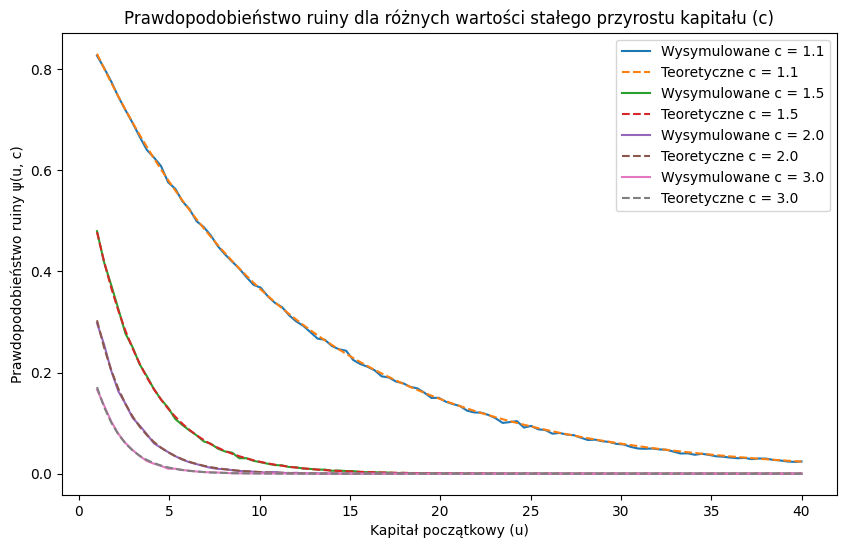

In [6]:
u_values = np.linspace(1, 40, 100)
c_values = [1.1, 1.5, 2.0, 3.0]  

plt.figure(figsize=(10, 6))
for c in c_values:
    psi_sim_values = [estimate_psi(u, c, lambd, eta, T, num_simulations) for u in u_values]
    psi_theoretical_values = [pollaczek_chinczyn_psi(u, c, lambd, eta) for u in u_values]
    
    plt.plot(u_values, psi_sim_values, label=f'Wysymulowane c = {c}')
    plt.plot(u_values, psi_theoretical_values, '--', label=f'Teoretyczne c = {c}')
    
plt.xlabel('Kapita≈Ç poczƒÖtkowy (u)')
plt.ylabel('Prawdopodobie≈Ñstwo ruiny œà(u, c)')
plt.legend()
plt.title('Prawdopodobie≈Ñstwo ruiny dla r√≥≈ºnych warto≈õci sta≈Çego przyrostu kapita≈Çu (c)')
plt.show()

#### Wykres 2: Prawdopodobie≈Ñstwo Ruiny dla r√≥≈ºnych warto≈õci kapita≈Çu poczƒÖtkowego (u)
W drugim wykresie analizujemy prawdopodobie≈Ñstwo ruiny w zale≈ºno≈õci od sta≈Çej stawki wp≈Çat ùëê dla r√≥≈ºnych warto≈õci kapita≈Çu poczƒÖtkowego ùë¢.

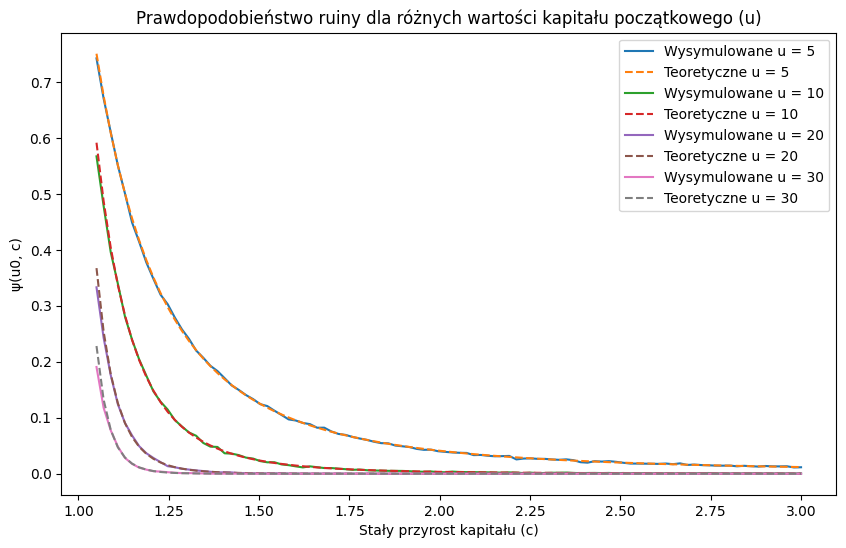

In [7]:
u0_values = [5, 10, 20, 30]
c_values_fine = np.linspace(1.05, 3, 100)

plt.figure(figsize=(10, 6))
for u0 in u0_values:
    psi_sim_values_fine = [estimate_psi(u0, c, lambd, eta, T, num_simulations) for c in c_values_fine]
    psi_theoretical_values_fine = [pollaczek_chinczyn_psi(u0, c, lambd, eta) for c in c_values_fine]

    plt.plot(c_values_fine, psi_sim_values_fine, label=f'Wysymulowane u = {u0}')
    plt.plot(c_values_fine, psi_theoretical_values_fine, '--', label=f'Teoretyczne u = {u0}')

plt.xlabel('Sta≈Çy przyrost kapita≈Çu (c)')
plt.ylabel('œà(u0, c)')
plt.legend()
plt.title('Prawdopodobie≈Ñstwo ruiny dla r√≥≈ºnych warto≈õci kapita≈Çu poczƒÖtkowego (u)')
plt.show()

#### Wykres 3: Wymagana warto≈õƒá sta≈Çej stawki wp≈Çat dla r√≥≈ºnych prawdopodobie≈Ñstw ruiny
Natomiast w trzecim wykresie przedstawiamy zale≈ºno≈õƒá miƒôdzy sta≈ÇƒÖ stawkƒÖ wp≈Çat ùëê, a prawdopodobie≈Ñstwem ruiny ùúì dla sta≈Çego kapita≈Çu poczƒÖtkowego $u_{0}$.

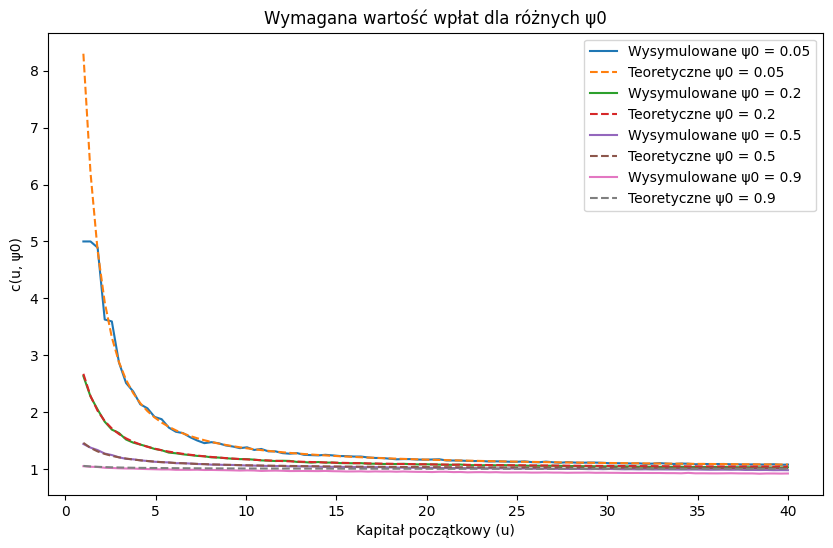

In [9]:
psi0_values = [0.05, 0.2, 0.5, 0.9]
u_values = np.linspace(1, 40, 100)

plt.figure(figsize=(10, 6))
for psi0 in psi0_values:
    c_values_teo = [inverse_c(u, psi0, lambd, eta) for u in u_values]
    c_values = [find_c(u, psi0, lambd, eta, T, num_simulations) for u in u_values]
    
    plt.plot(u_values, c_values, label=f'Wysymulowane œà0 = {psi0}')
    plt.plot(u_values, c_values_teo, label=f'Teoretyczne œà0 = {psi0}', linestyle='--')

plt.xlabel('Kapita≈Ç poczƒÖtkowy (u)')
plt.ylabel('c(u, œà0)')
plt.legend()
plt.title('Wymagana warto≈õƒá wp≈Çat dla r√≥≈ºnych œà0')
plt.show()

W przeprowadzonych analizach por√≥wnali≈õmy wyniki wyestymowanych warto≈õci z ich teoretycznymi odpowiednikami. Wszystkie trajektorie dla przeprowadzonych symulacji pokrywajƒÖ z oczekiwanymi warto≈õciami dla zadanych parametr√≥w, a wiƒôc uzyskane rezulaty potwierdzajƒÖ poprawno≈õƒá zaimplementowanego modelu.

## 6: Prawa arcusa sinusa

### Cel
Weryfikacja symulacyjnie prawa arcusa sinusa dla procesu Wienera. W tym celu u≈ºyjemy por√≥wnania histogram√≥w oraz
dystrybuant empirycznych wysymulowanych pr√≥bek z teoretycznymi warto≈õciami.

### RozwiƒÖzanie

#### Proces Wienera
Zaczniemy od implementacji procesu Wienera $W_t$ oraz stworzenia wykresu przyk≈Çadowej trajektorii. OpisujƒÖc po kr√≥tce ten proces jest on znany r√≥wnie≈º jako ruch Browna. Jest procesem stochastycznym, kt√≥ry modeluje losowe zmiany w czasie, gdzie ka≈ºda zmiana w kr√≥tkim okresie jest losowa i ma rozk≈Çad normalny. Mo≈ºna go opisaƒá r√≥wnaniem r√≥≈ºniczkowym:
\begin{equation*}
dW(t)=œµ\sqrt{dt},
‚Äã\end{equation*}
gdzie œµ to zmienna losowa z rozk≈Çadem normalnym $N(0,1)$.

In [15]:
def wiener_process(n):
    """
    Generuje n liczb z procesu Wienera

    :param n: (int) liczba liczb do wygenerowania
    :return: (np.ndarray) n liczb z procesu Wienera
    """
    return np.concatenate((np.zeros(1), np.cumsum(norm_inv_cdf(n-1, 0, 1/n))))

Text(0.5, 1.0, 'Przyk≈Çadowa trajektoria realizacji procesu Wienera')

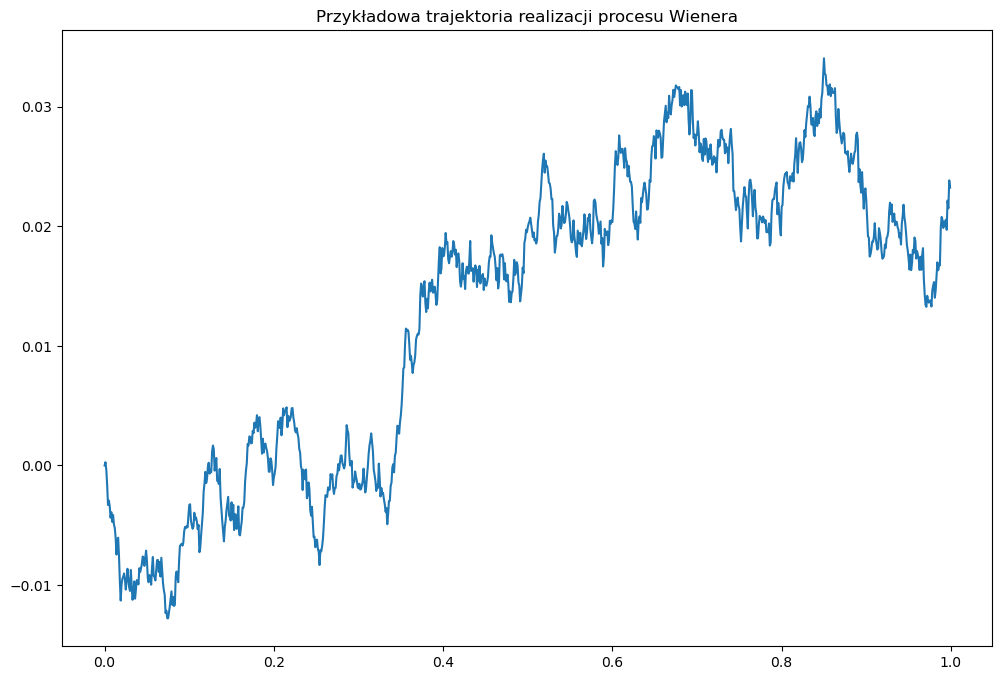

In [16]:
h = 0.001
fig, ax = plt.subplots()
ax.plot(np.arange(0, 1, h), wiener_process(1000), label='W_t')
ax.set_title('Przyk≈Çadowa trajektoria realizacji procesu Wienera')

### Rozk≈Çad arcusa sinusa
PrzechodzƒÖc dalej om√≥wimy teraz pokr√≥tce rozk≈Çad arcusa sinusa.

Niech $X$ bƒôdzie zmiennƒÖ¬†losowƒÖ z rozk≈Çadu arcusa sinusa ($X$ ~ Arcsine). Wtedy jej gƒôsto≈õƒá wyra≈ºa siƒô¬†wzorem 
\begin{equation*}
    f(x) = \frac{1}{\pi\sqrt{x-x^2}}\mathbb{1}_{(0,1)}(x).
\end{equation*}
Z kolei dystrybuanta ma postaƒá
\begin{equation*}
F(x) = \begin{cases}
0, & \text{gdy } x < 0,\\
\frac{2}{\pi}\arcsin\sqrt{x}, & \text{gdy } x = 0,\\
1, & \text{gdy } x < 0.
\end{cases}
\end{equation*}

In [144]:
f_arcsin = lambda x: 1 / (np.pi * np.sqrt(x - x**2))  # gƒôsto≈õƒá
F_arcsin = lambda x: 2 / np.pi * np.arcsin(np.sqrt(x))  # dystrybuanta

### I prawo arcusa sinusa

\begin{equation*}
 T_+ = \lambda(\{t \in [0,1] | W_t > 0\}) \sim \text{Arcsine},
\end{equation*}

gdzie $\lambda$ to miara Lebesgue'a. StƒÖd d≈Çugo≈õƒá czasu, w kt√≥rym proces znajdowa≈Ç siƒô¬†powy≈ºej osi $OX$ ma rozk≈Çad arcusa sinusa.

C:\Users\Aleksandra\AppData\Local\Temp\ipykernel_7288\3346428493.py:1: RuntimeWarning: divide by zero encountered in divide
  f_arcsin = lambda x: 1 / (np.pi * np.sqrt(x - x**2))  # gƒôsto≈õƒá


Text(0.5, 1.0, 'Dystrybuanta')

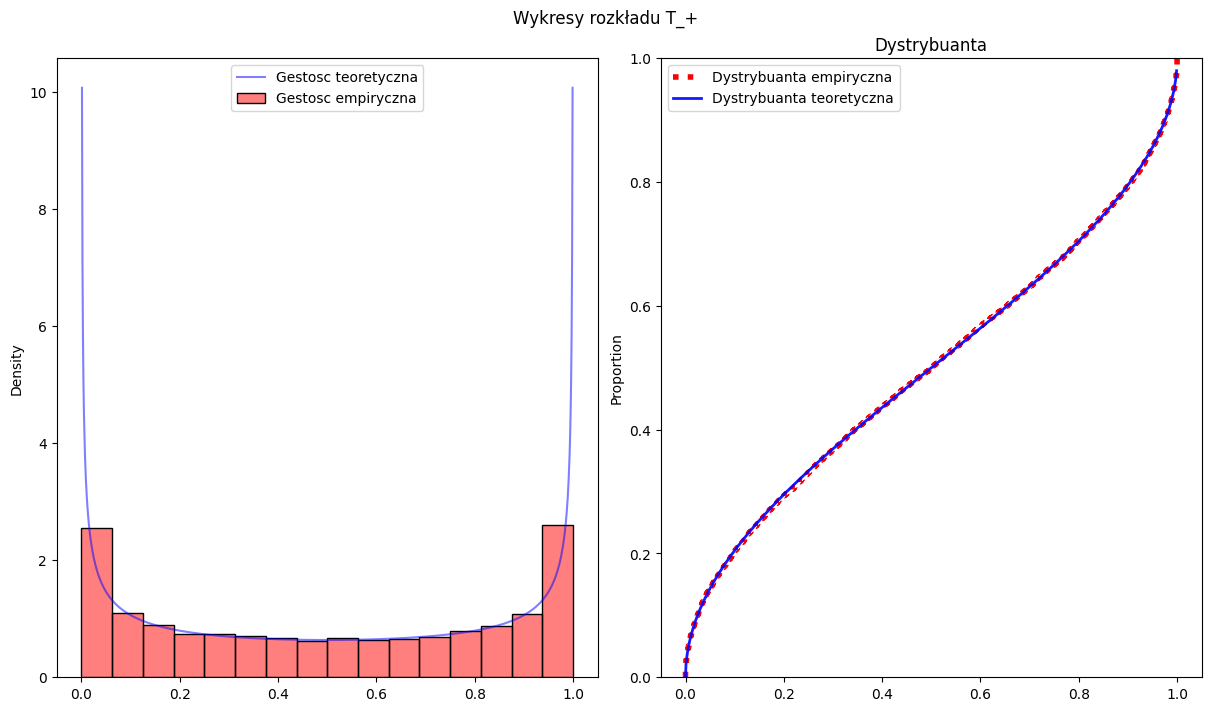

In [145]:
Ts = np.zeros(10000)
for i in range(10000):
    Xs = wiener_process(1000)
    Xs_pos = Xs[Xs > 0]
    Ts[i] = len(Xs_pos) / 1000

fig, axes = plt.subplots(ncols=2, layout="constrained")
sns.histplot(Ts, stat='density', color='red', alpha=0.5, ax=axes[0], label='Gestosc empiryczna')
sns.lineplot(x=np.unique(Ts), y=f_arcsin(np.unique(Ts)), color='blue', alpha=0.5, ax=axes[0],
             label='Gestosc teoretyczna')
sns.ecdfplot(Ts, ax=axes[1], color='red', linestyle=':', linewidth=4, label='Dystrybuanta empiryczna')
sns.lineplot(x=np.arange(0, 1, 0.001), y=F_arcsin(np.arange(0, 1, 0.001)), ax=axes[1], color='blue',
             label='Dystrybuanta teoretyczna', linewidth=2, alpha=0.9)
fig.suptitle('Wykresy rozk≈Çadu T_+')
# axes[0].set_title('Gƒôsto≈õƒá')
axes[1].set_title('Dystrybuanta')

## II prawo arcusa sinusa

\begin{equation}
 L = \text{sup}\{t\in [0,1] | W_t = 0\} \sim \text{Arcsine},
\end{equation}

czyli moment, w kt√≥rym proces przecina o≈õ $OX$ ma rozk≈Çad arcusa sinusa.

Text(0.5, 1.0, 'Dystrybuanta')

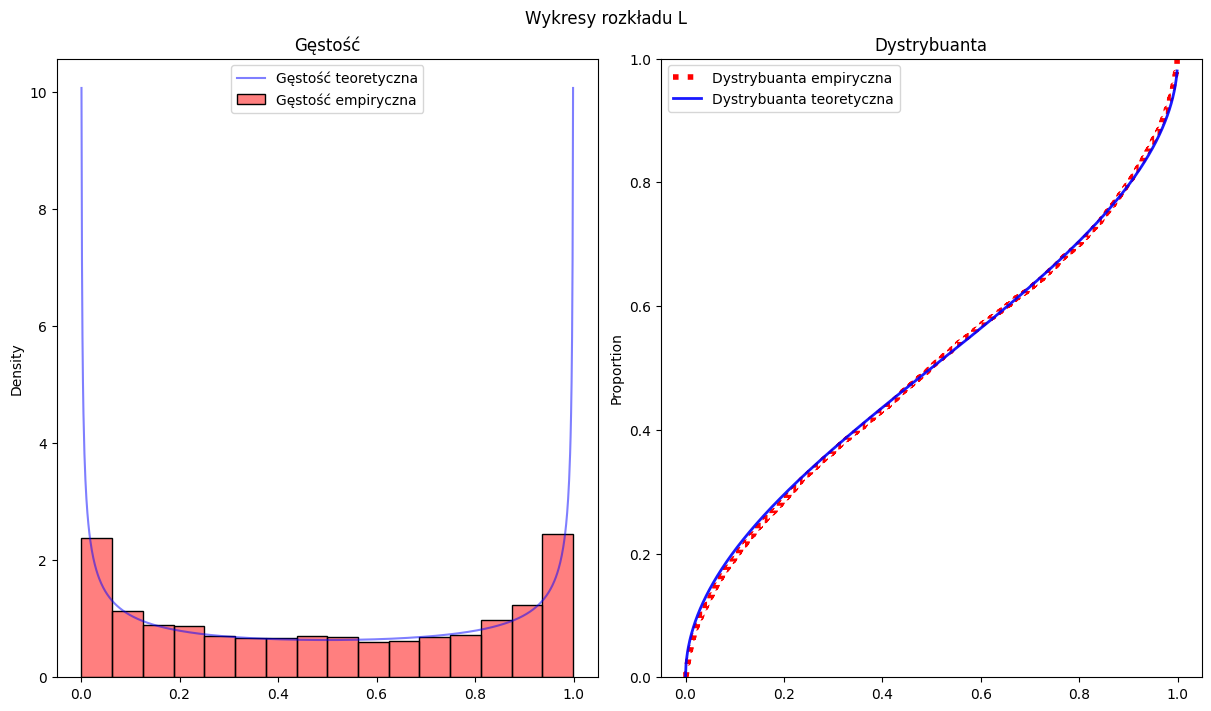

In [146]:
Ts = np.zeros(10000)
i = 0
while i != 10000:
    Xs = wiener_process(1000)
    if np.any(Xs > 0) and np.any(Xs < 0):
        Xs = Xs[:-1] * Xs[1:]
        Ts[i] = np.where(Xs < 0)[0][-1] / len(Xs)
        i += 1

fig, axes = plt.subplots(ncols=2, layout="constrained")
sns.histplot(Ts, stat='density', color='red', alpha=0.5, ax=axes[0], label='Gƒôsto≈õƒá empiryczna')
sns.lineplot(x=np.unique(Ts), y=f_arcsin(np.unique(Ts)), color='blue', alpha=0.5, ax=axes[0],
             label='Gƒôsto≈õƒá teoretyczna')
sns.ecdfplot(Ts, ax=axes[1], color='red', linestyle=':', linewidth=4, label='Dystrybuanta empiryczna')
sns.lineplot(x=np.arange(0, 1, 0.001), y=F_arcsin(np.arange(0, 1, 0.001)), ax=axes[1], color='blue',
             label='Dystrybuanta teoretyczna', linewidth=2, alpha=0.9)
fig.suptitle('Wykresy rozk≈Çadu L')
axes[0].set_title('Gƒôsto≈õƒá')
axes[1].set_title('Dystrybuanta')

### III prawo arcusa sinusa

\begin{equation}
 W_M = sup\{W_t | t\in [0,1]\},
\end{equation}

wtedy $M$ ~ Arcsine. Czyli moment, w kt√≥rym proces osiƒÖga maksymalnƒÖ warto≈õƒá ma rozk≈Çad arcusa sinusa.

C:\Users\Aleksandra\AppData\Local\Temp\ipykernel_7288\3346428493.py:1: RuntimeWarning: divide by zero encountered in divide
  f_arcsin = lambda x: 1 / (np.pi * np.sqrt(x - x**2))  # gƒôsto≈õƒá


Text(0.5, 1.0, 'Dystrybuanta')

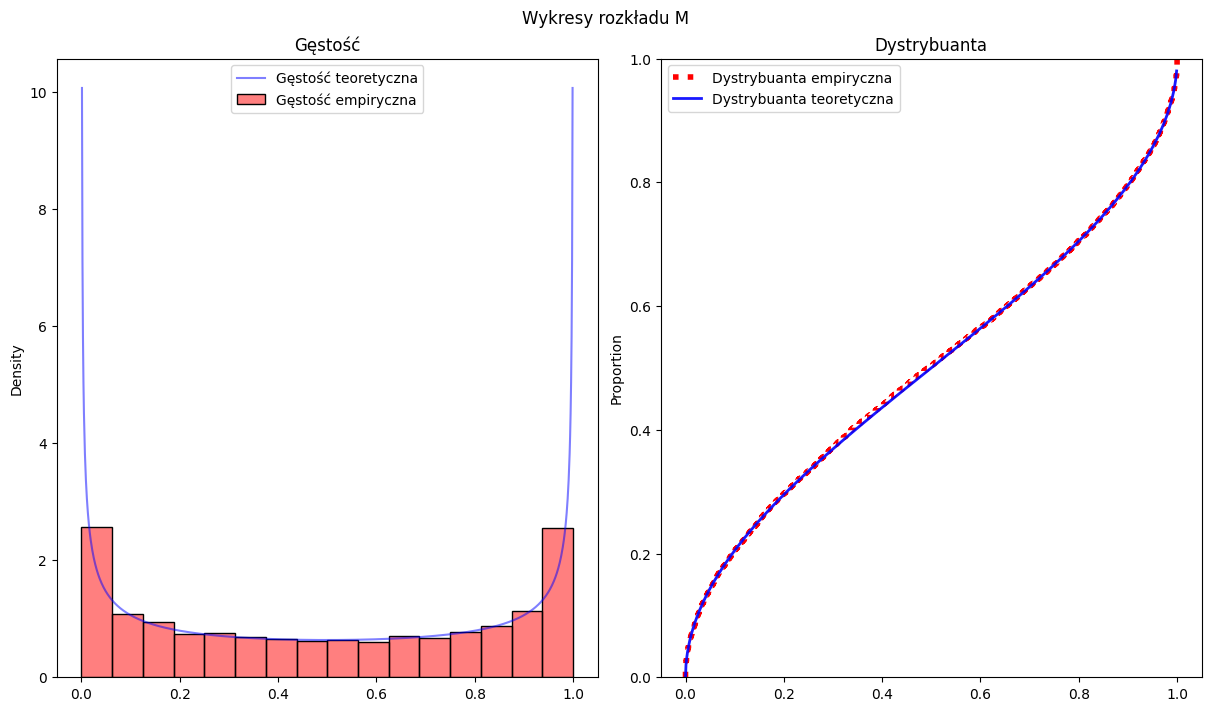

In [147]:
Ts = np.zeros(10000)
for i in range(10000):
    Xs = wiener_process(1000)
    Ts[i] = np.argmax(Xs) / 1000

fig, axes = plt.subplots(ncols=2, layout="constrained")
sns.histplot(Ts, stat='density', color='red', alpha=0.5, ax=axes[0], label='Gƒôsto≈õƒá empiryczna')
sns.lineplot(x=np.unique(Ts), y=f_arcsin(np.unique(Ts)), color='blue', alpha=0.5, ax=axes[0],
             label='Gƒôsto≈õƒá teoretyczna')
sns.ecdfplot(Ts, ax=axes[1], color='red', linestyle=':', linewidth=4, label='Dystrybuanta empiryczna')
sns.lineplot(x=np.arange(0, 1, 0.001), y=F_arcsin(np.arange(0, 1, 0.001)), ax=axes[1], color='blue',
             label='Dystrybuanta teoretyczna', linewidth=2, alpha=0.9)
fig.suptitle('Wykresy rozk≈Çadu M')
axes[0].set_title('Gƒôsto≈õƒá')
axes[1].set_title('Dystrybuanta')

Jak widaƒá na wykresach, gƒôsto≈õci i dystrybuanty empiryczne tych trzech zmiennych losowych pokrywajƒÖ siƒô¬†z gƒôsto≈õciƒÖ i dystrybuantƒÖ¬†rozk≈Çadu arcusa sinusa.

Dodatkowo dla domy≈õlnych 20 realizacji zmiennych losowych przeprowadzili≈õmy test Kolmogorova-Smirnova przy u≈ºyciu funkcji $scipy.stats.kstest$. Statysyka testowa dla ka≈ºdego z generator√≥w jest rzƒôdu $10^{-1}$. P-warto≈õci r√≥wnie≈º sƒÖ na podobnym poziomie. BiorƒÖc pod uwagƒô poziom istotno≈õci testu $\alpha = 0.05$, nie mamy przes≈Çanek do odrzucenia hipotezy zerowej ($H_0$ - realizacje pochodzƒÖ z rozk≈Çadu normalnego) dla ≈ºadnego z generator√≥w.

## Podsumowanie 
W powy≈ºszej pracy rozwa≈ºyli≈õmy wszystkie zadane zagadnienia. Dzia≈Çania symulacyjne bez wiƒôkszych odchyle≈Ñ pokaza≈Çy poprawno≈õƒá implementacji. KorzystajƒÖc z metod poznanych na zajƒôciach takich jak metoda odwrotnej dystrybuanty byli≈õmy w stanie rzeczowo podej≈õƒá do problem√≥w i zrealizowaƒá zadanie.